In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
'''
Add plt config
@Author: MinHyung Lee
@Since: 2022/05/24

'''

plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
rcParams['figure.dpi'] = 600

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [3]:
# Load raw dataset
df = pd.read_csv('Google-Playstore.csv')

df.head()

App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price Currency  Size  \
0              10.0                15  True    0.0      USD   10M   
1            5000.0              7662  True    0.0      USD  2.9M   
2              50.0                58  True    0.0      USD  3.7M   
3              10.0                19  True    0.0      USD  1.8M   
4             100.0               478  True    0.0      USD  6.2M   

  Minimum Android                       Developer Id  \
0      7.1 and up  Jean Confident Irénée NIYIZIBYOSE   
1      5.0 and up                         Webserveis   
2    4.0.3 and up                         Cabin Crew   
3    4.0.3 and up                Climate Smart Tech2   
4      4.1 and up              Rafal Milek-Horodyski   

                  Developer Website              Developer Email  \
0       https://beniyizibyose.tk/#/       jean21101999@gmail.com   
1   https://webserveis.netlify.app/         webserveis@gmail.com   
2                               NaN          vnacrewit@gmail.com   
3  http://www.climatesmarttech.com/  climatesmarttech2@gmail.com   
4       http://www.horodyski.com.pl    rmilekhorodyski@gmail.com   

       Released  Last Updated Content Rating  \
0  Feb 26, 2020  Feb 26, 2020       Everyone   
1  May 21, 2020  May 06, 2021       Everyone   
2   Aug 9, 2019  Aug 19, 2019       Everyone   
3  Sep 10, 2018  Oct 13, 2018       Everyone   
4  Feb 21, 2020  Nov 12, 2018       Everyone   

                                      Privacy Policy  Ad Supported  \
0                 https://beniyizibyose.tk/projects/         False   
1  https://dev4phones.wordpress.com/licencia-de-uso/          True   
2  https://www.vietnamairlines.com/vn/en/terms-an...         False   
3                                                NaN          True   
4                        http://www.horodyski.com.pl         False   

   In App Purchases  Editors Choice         Scraped Time  
0             False           False  2021-06-15 20:19:35  
1             False           False  2021-06-15 20:19:35  
2             False           False  2021-06-15 20:19:35  
3             False           False  2021-06-15 20:19:35  
4             False           False  2021-06-15 20:19:35

## RAW data EDA

In [4]:
df.describe()

Rating  Rating Count  Minimum Installs  Maximum Installs  \
count  2.290061e+06  2.290061e+06      2.312837e+06      2.312944e+06   
mean   2.203152e+00  2.864839e+03      1.834452e+05      3.202017e+05   
std    2.106223e+00  2.121626e+05      1.513144e+07      2.355495e+07   
min    0.000000e+00  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00      5.000000e+01      8.400000e+01   
50%    2.900000e+00  6.000000e+00      5.000000e+02      6.950000e+02   
75%    4.300000e+00  4.200000e+01      5.000000e+03      7.354000e+03   
max    5.000000e+00  1.385576e+08      1.000000e+10      1.205763e+10   

              Price  
count  2.312944e+06  
mean   1.034992e-01  
std    2.633127e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    4.000000e+02

In [5]:
#Groupby category and calculate sum for Rating and Maximum Install

category_dist = df.groupby(['Category'])[['Rating', 'Maximum Installs']].agg('sum')\
                    .sort_values(by=['Rating', 'Maximum Installs'], ascending=[False, False])


In [6]:
#Calculate rating as a percentage
(df.groupby(['Category']).agg('sum')['Rating']
                    .transform(lambda x: x/x.sum())*100)\
                    .to_frame().sort_values(by='Rating', ascending=False)


Rating
Category                    
Education          10.678358
Music & Audio       6.823017
Entertainment       6.640844
Tools               6.601673
Books & Reference   5.696467
...                      ...
Dating              0.313368
Music               0.218591
Libraries & Demo    0.209648
Parenting           0.180784
Comics              0.160185

[48 rows x 1 columns]

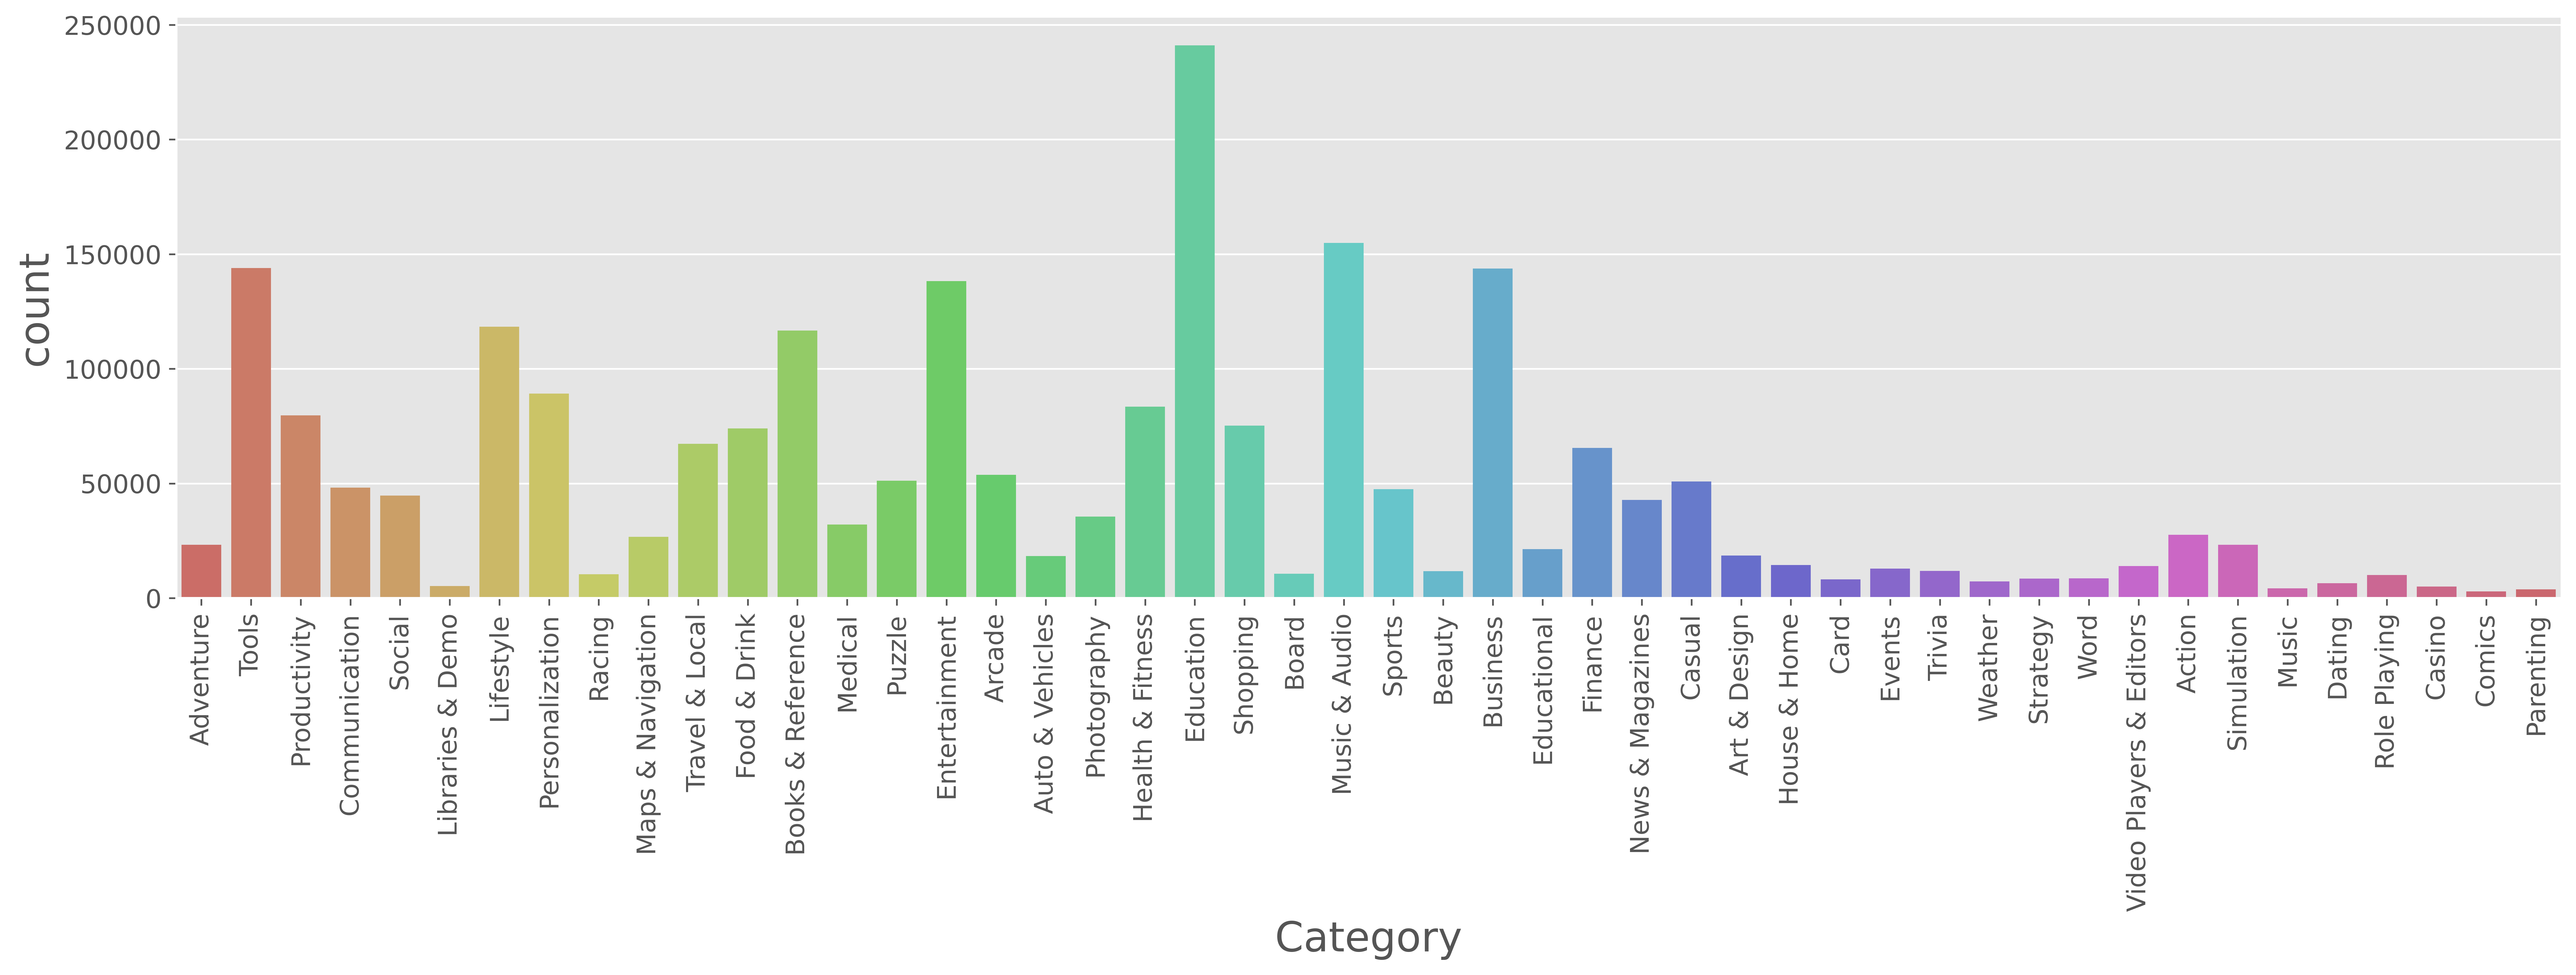

In [7]:
#Count category feature and plot by seaborn countplot
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

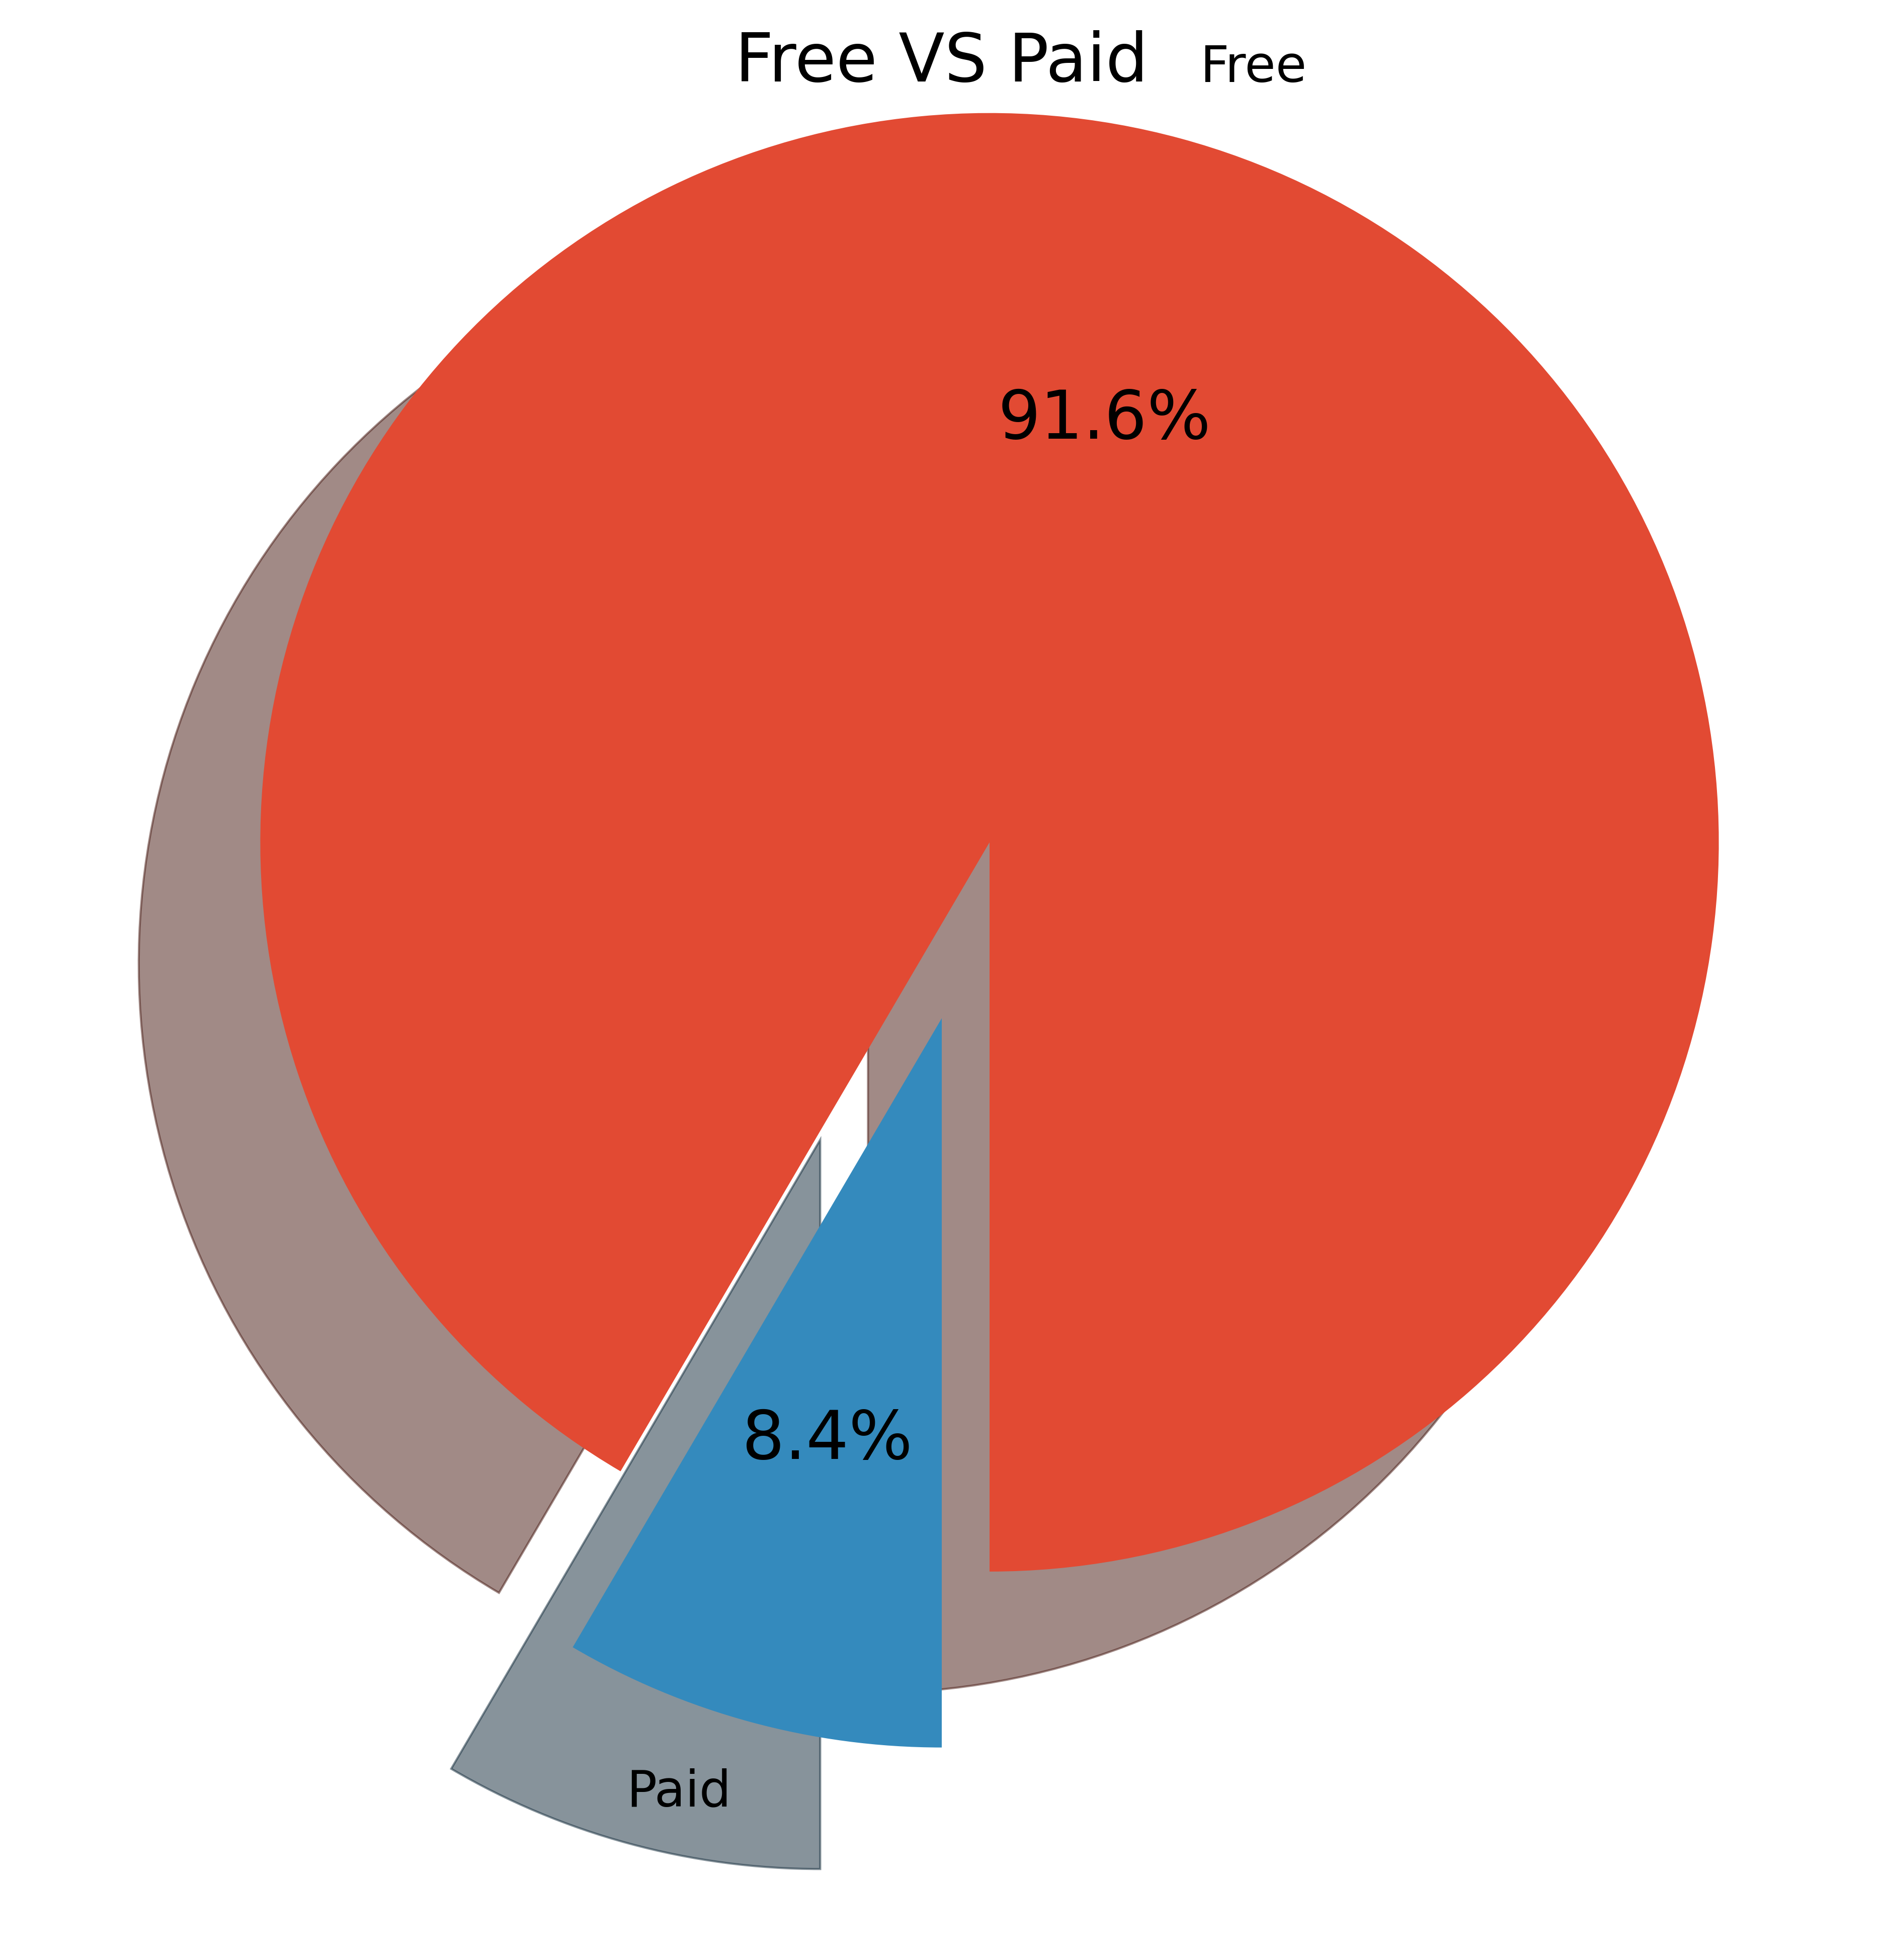

In [8]:
#Count In App purchases feature and plot by pie chart
plt.figure(figsize=(8,8))
count = df['In App Purchases'].value_counts()
plt.pie(count, explode=(0.25,0), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Free VS Paid', size = 16)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Tools'),
  Text(4, 0, 'Books & Reference'),
  Text(5, 0, 'Personalization'),
  Text(6, 0, 'Lifestyle'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Puzzle'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Arcade'),
  Text(14, 0, 'Travel & Local'),
  Text(15, 0, 'Casual'),
  Text(16, 0, 'Sports'),
  Text(17, 0, 'News & Magazines'),
  Text(18, 0, 'Social'),
  Text(19, 0, 'Communication'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Photography'),
  Text(22, 0, 'Simulation'),
  Text(23, 0, 'Action'),
  Text(24, 0, 'Adventure'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  

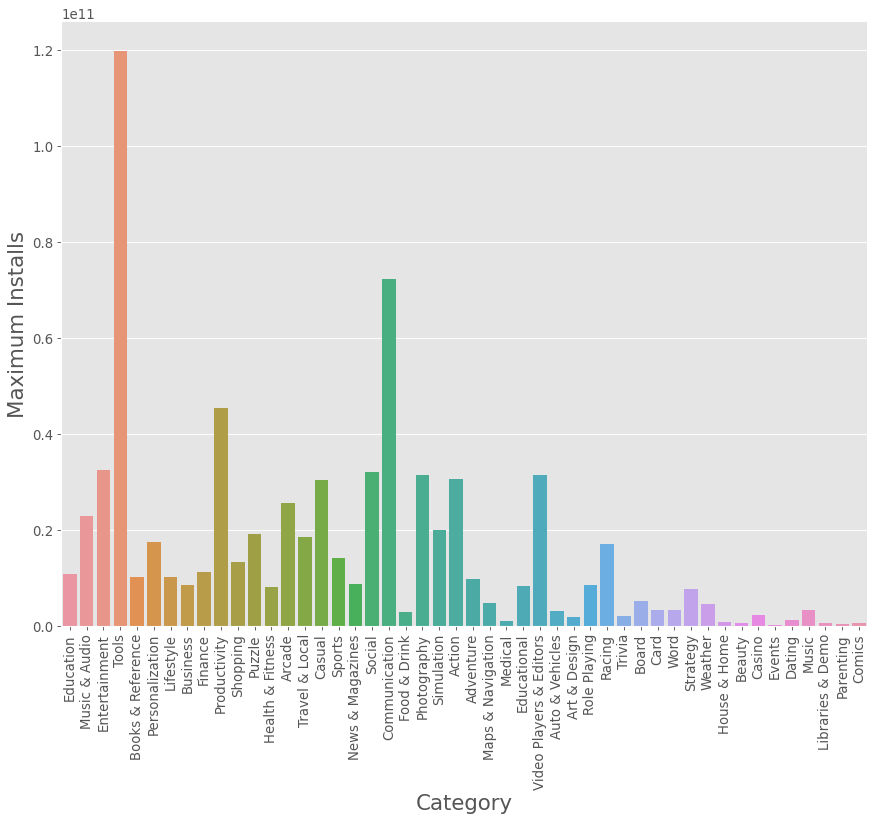

In [9]:
#Plot Maximum installs Plot by each category
plt.figure(figsize=(13,10), dpi= 80)
ax = sns.barplot(x=category_dist.index, y=category_dist["Maximum Installs"])
plt.xticks(rotation=90)

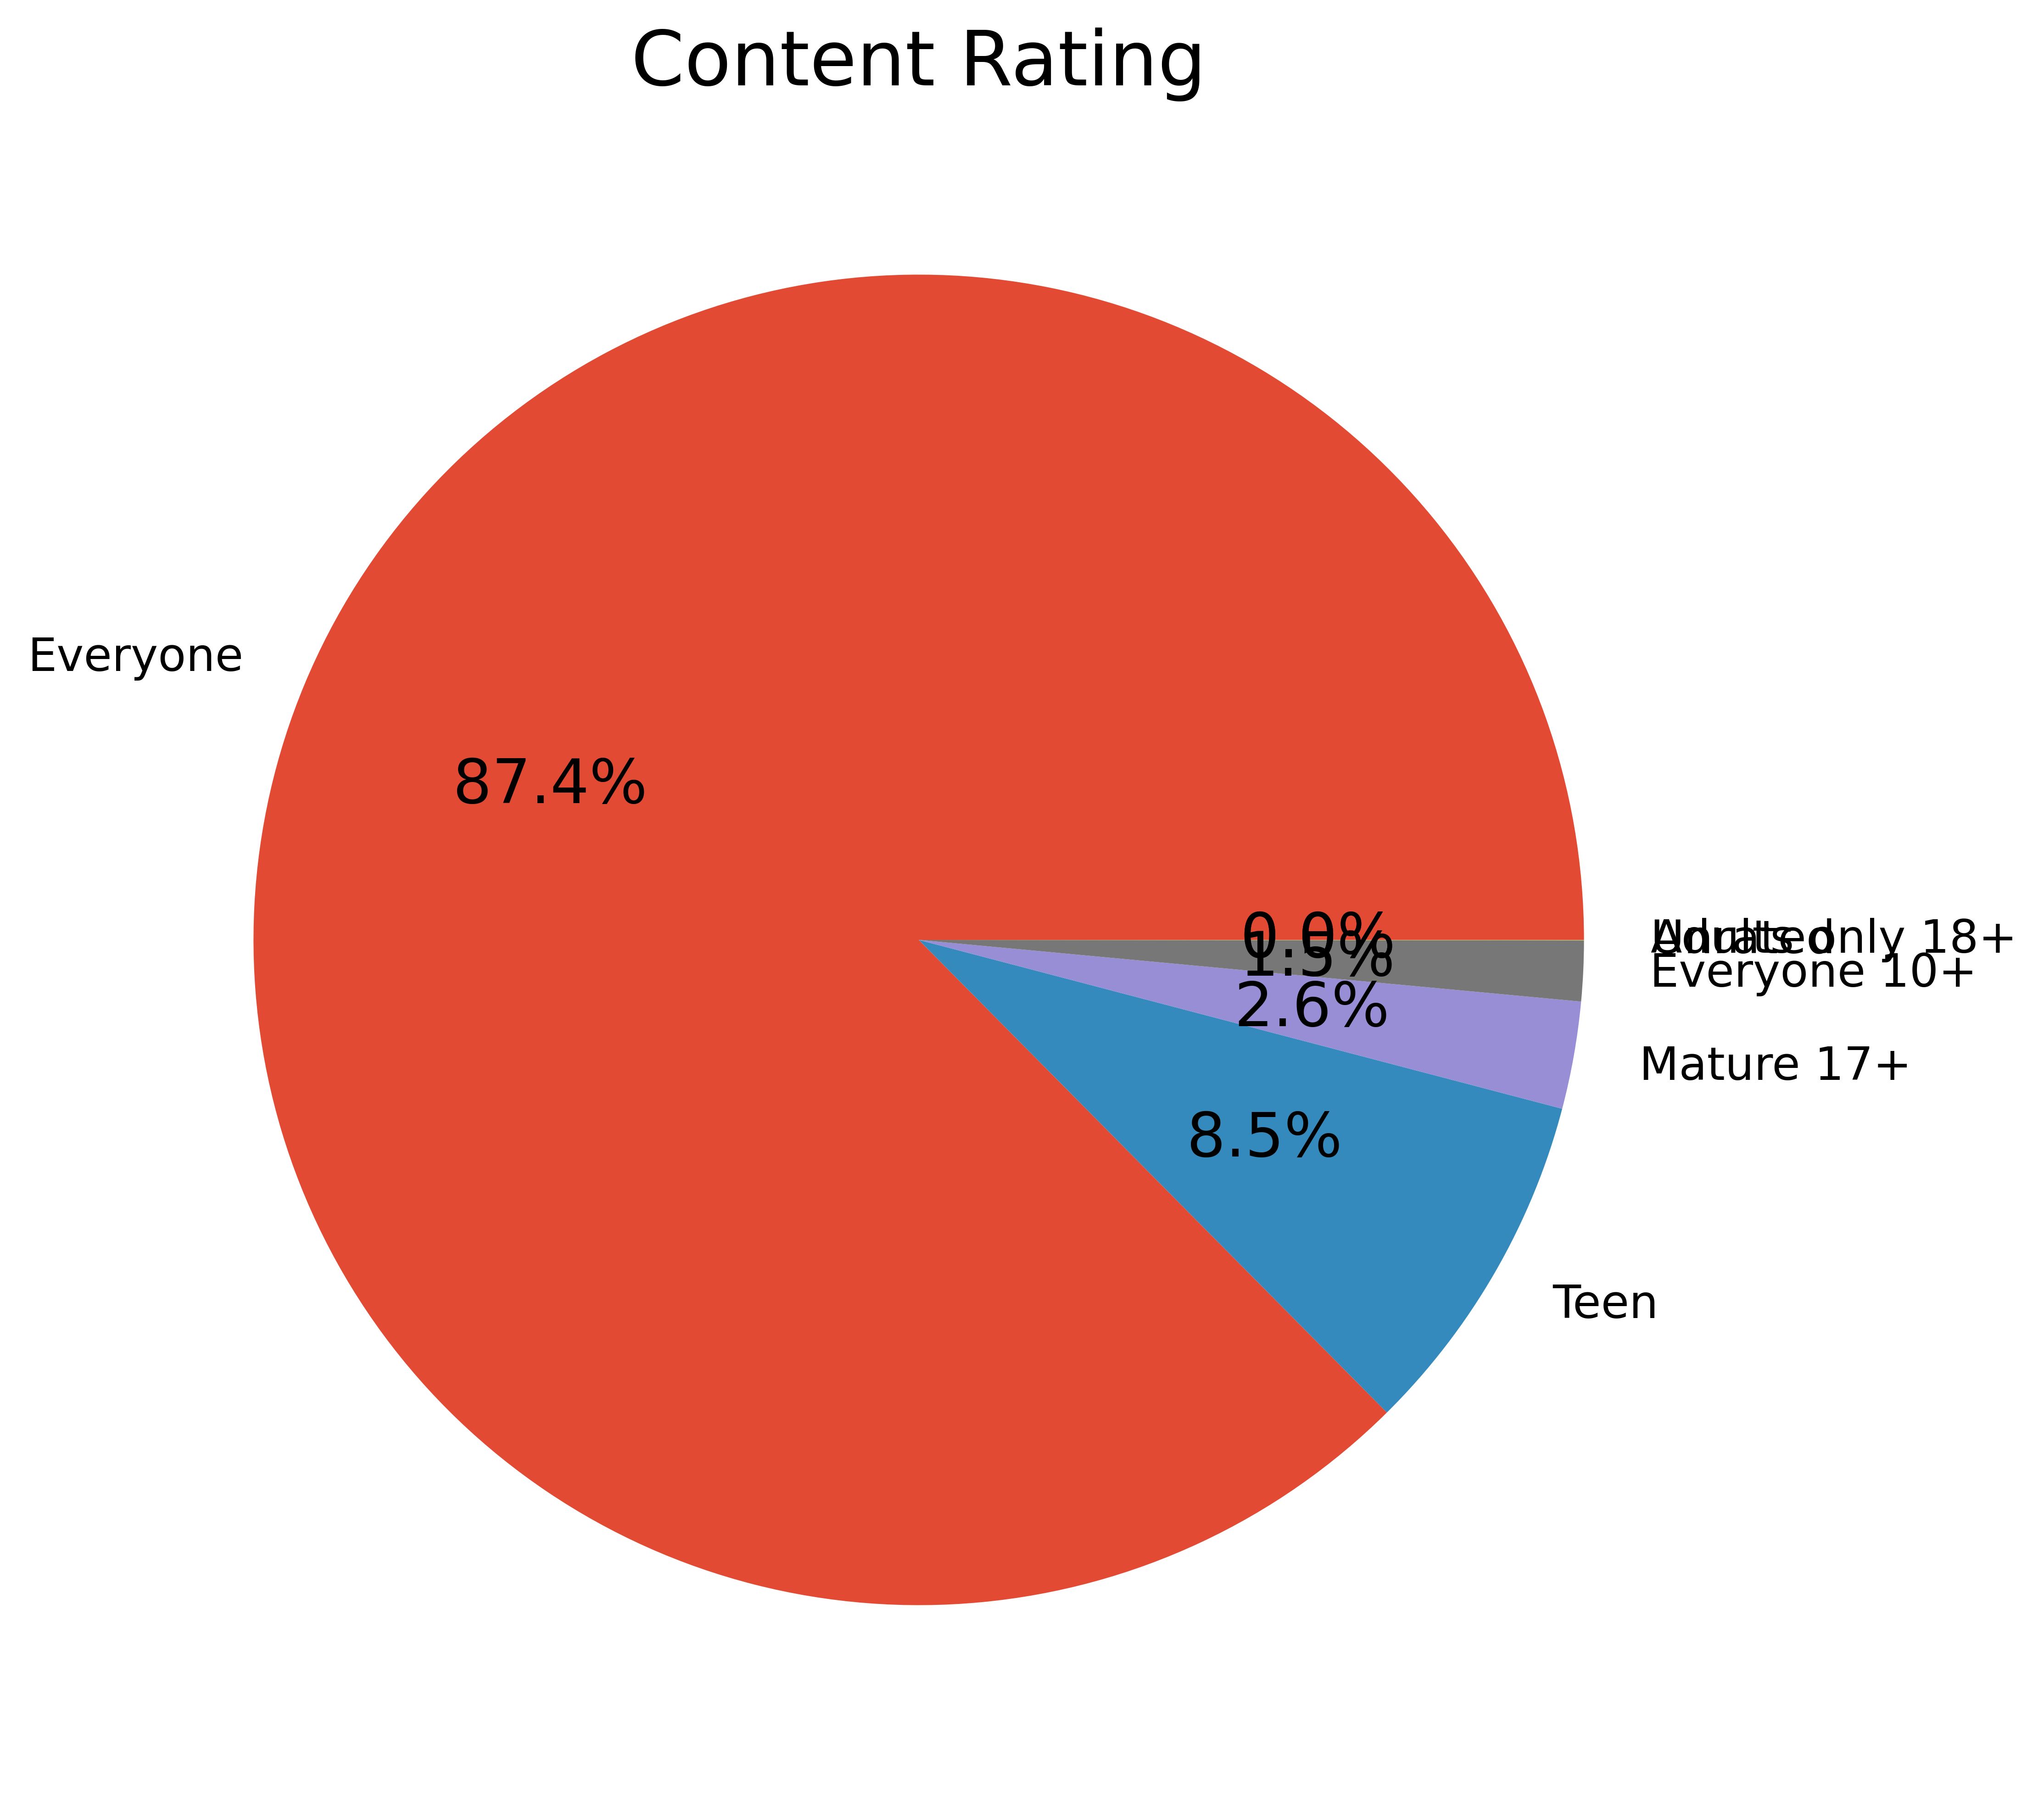

In [10]:
## Plot pie chart content rating
fig = plt.figure(figsize=(16,8))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False)
plt.title('Content Rating',size = 20)
plt.show()

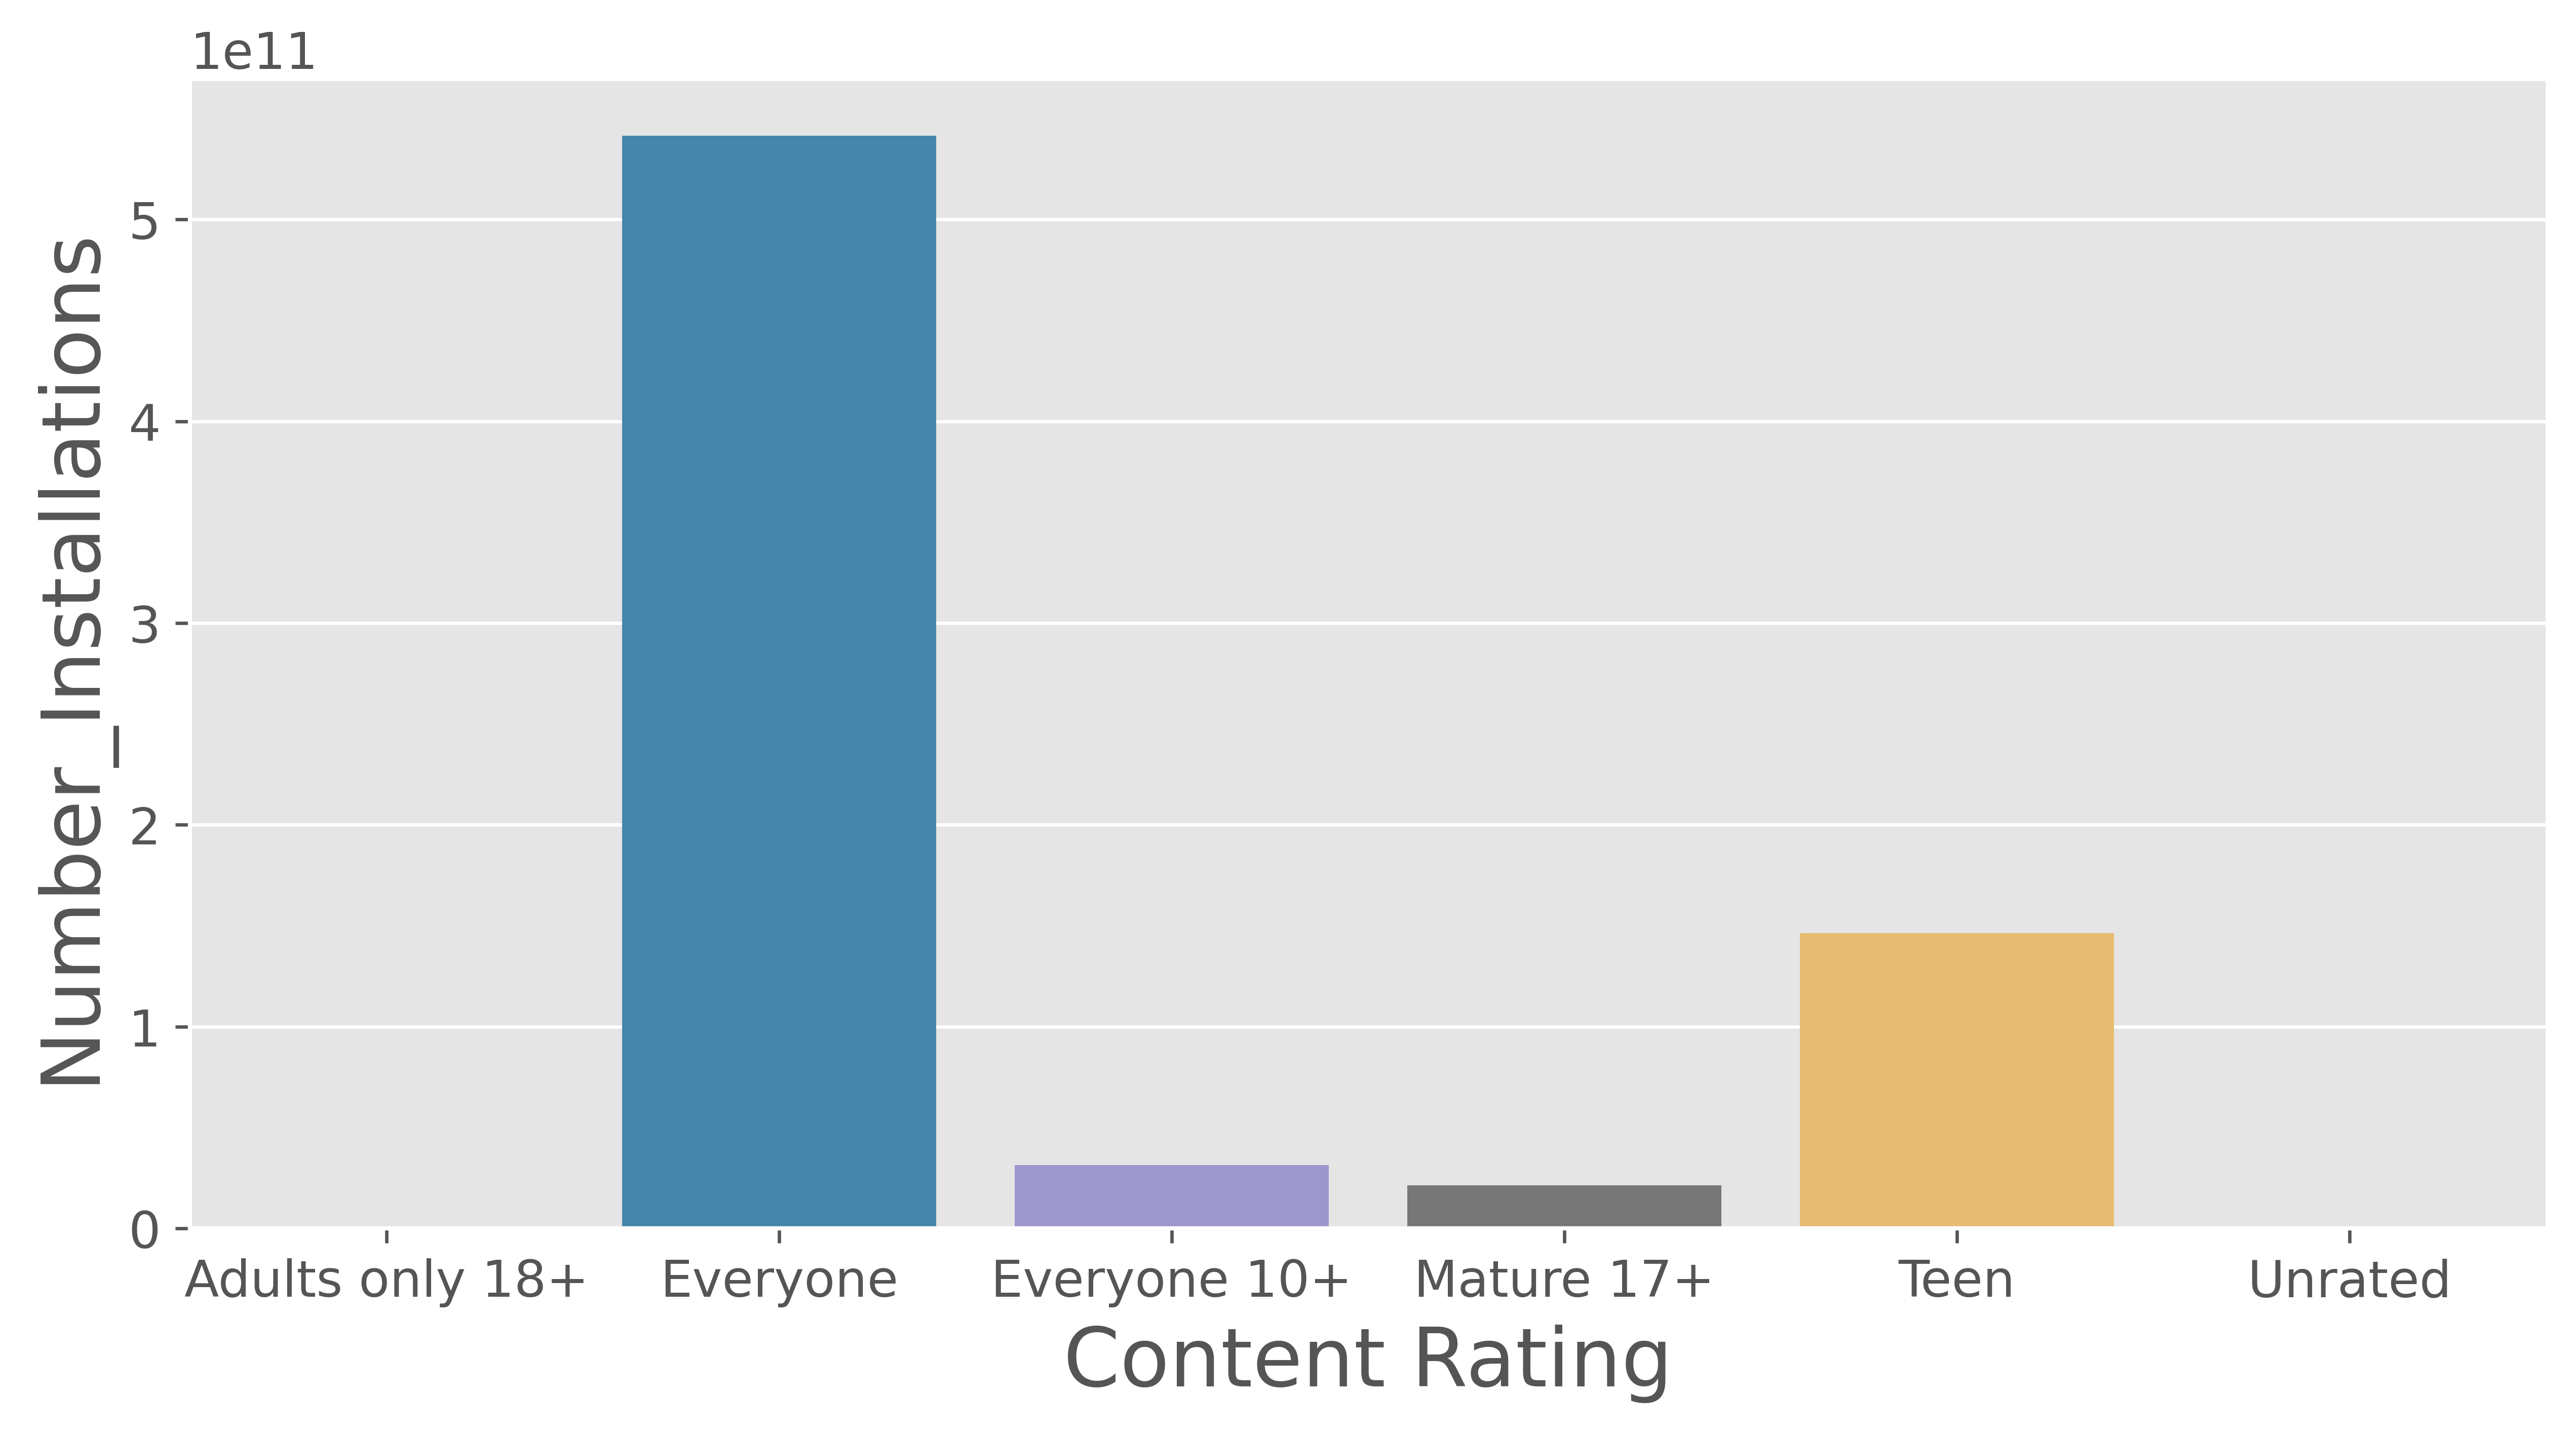

In [11]:
# plot Maximum installs by content rating
data_cont =  df.groupby('Content Rating')['Maximum Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.show()

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

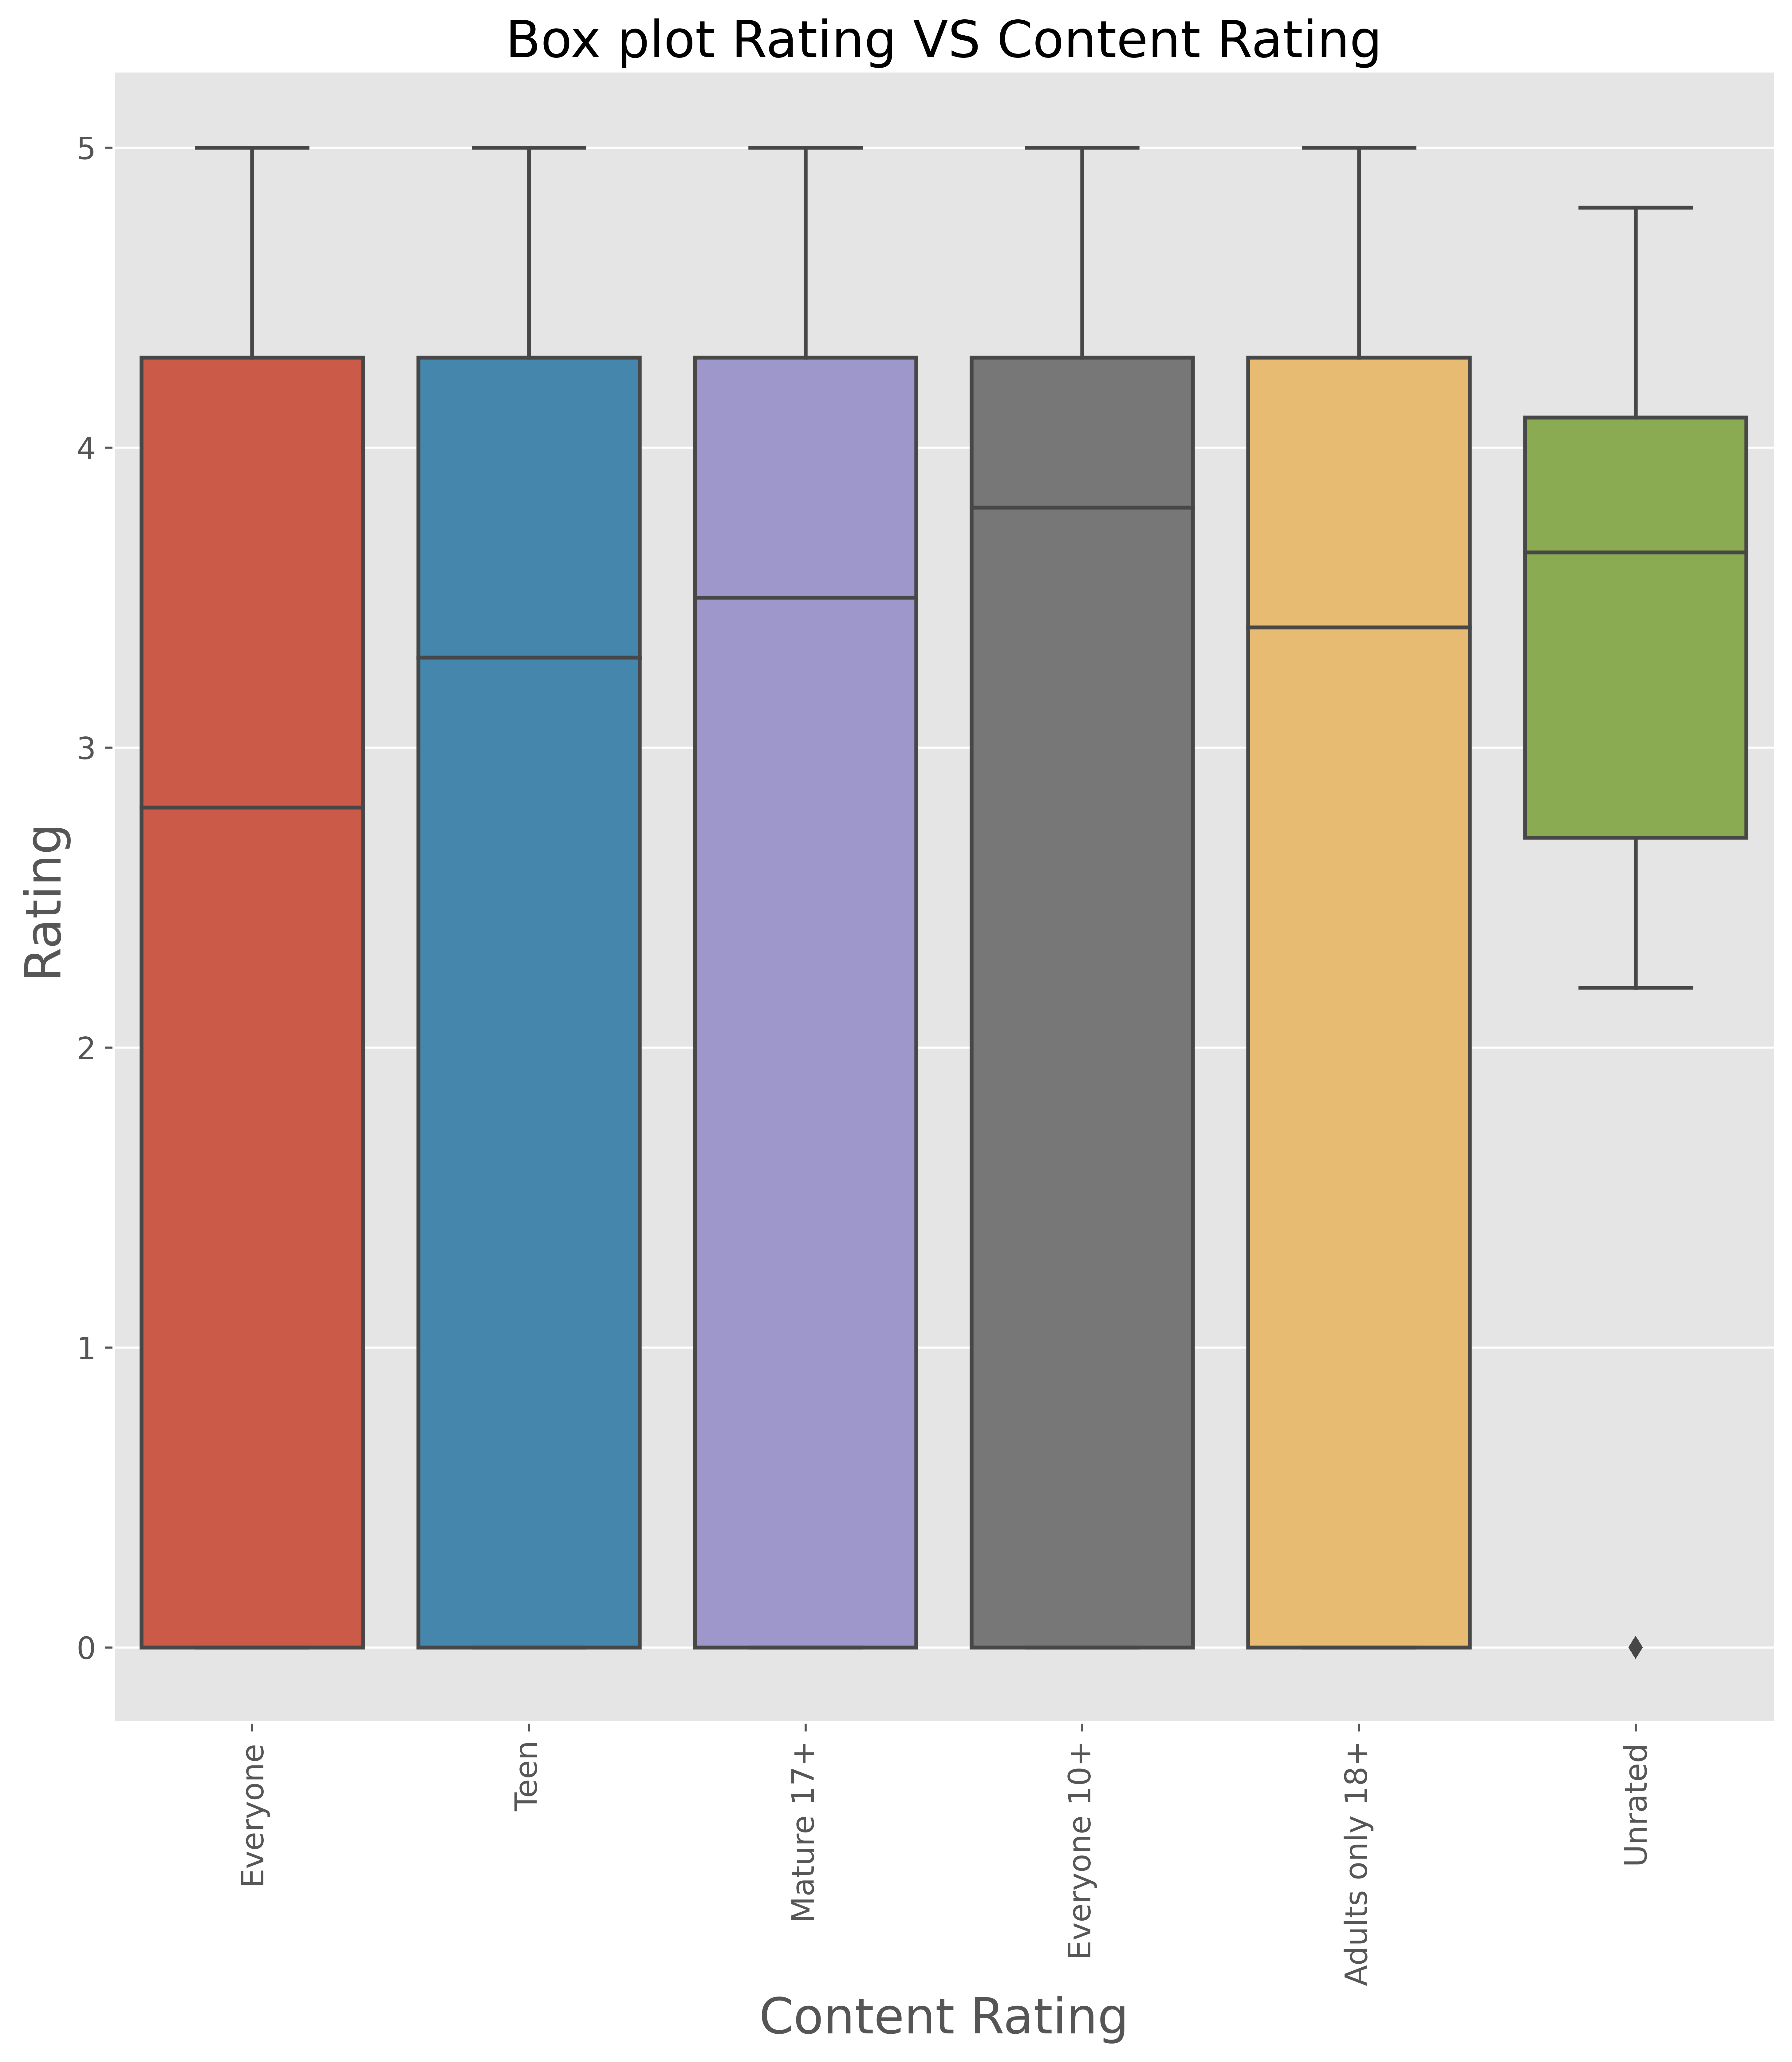

In [12]:
# Boxplot Rating following content rating
_ = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

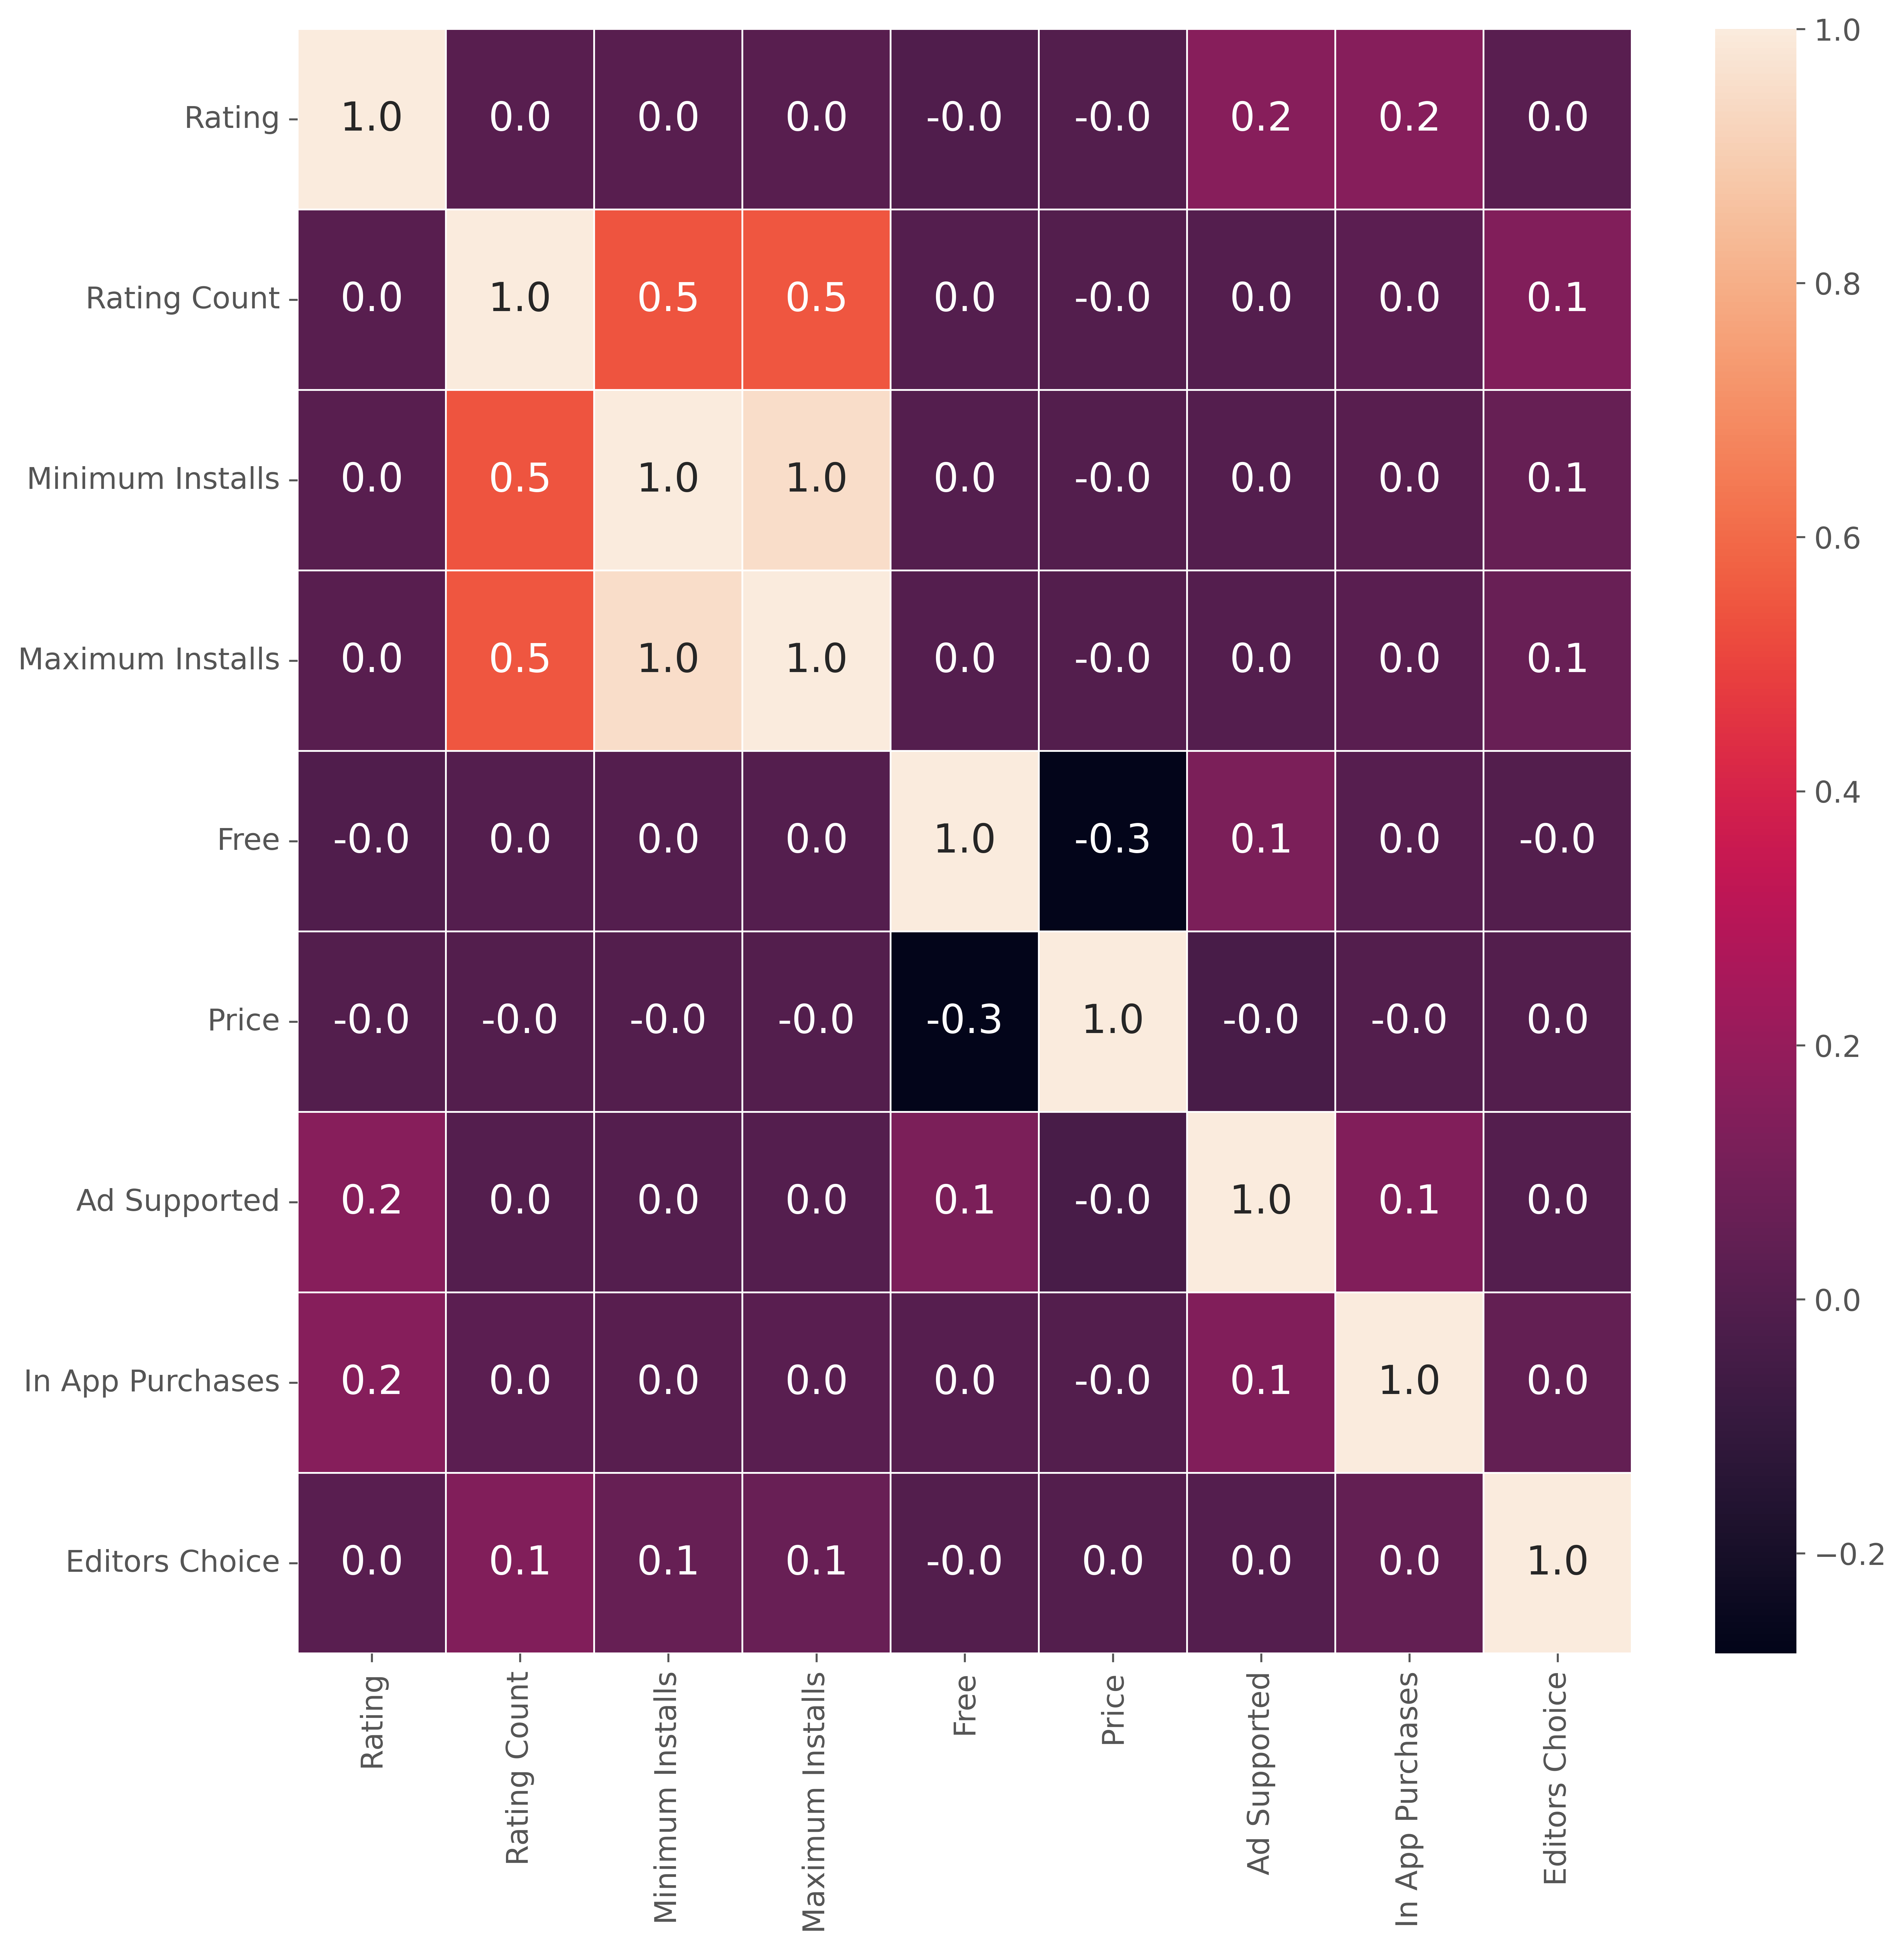

In [13]:

# Find correlation between each features and plot using heatmap
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [14]:
#Run Random sampling
df = df.sample(n=20000, replace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 2249330 to 2108039
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           20000 non-null  object 
 1   App Id             20000 non-null  object 
 2   Category           20000 non-null  object 
 3   Rating             19793 non-null  float64
 4   Rating Count       19793 non-null  float64
 5   Installs           19998 non-null  object 
 6   Minimum Installs   19998 non-null  float64
 7   Maximum Installs   20000 non-null  int64  
 8   Free               20000 non-null  bool   
 9   Price              20000 non-null  float64
 10  Currency           19998 non-null  object 
 11  Size               19997 non-null  object 
 12  Minimum Android    19945 non-null  object 
 13  Developer Id       20000 non-null  object 
 14  Developer Website  13595 non-null  object 
 15  Developer Email    19999 non-null  object 
 16  Released      

In [15]:
df

App Name  \
2249330                 Portugália Macau   
28601                           OWL貓頭鷹股市   
1142461                CIS Jubail Mobile   
361807                       Let Me Know   
343573                   Pocket Dyno App   
...                                  ...   
1781325       Yoga in Marathi | योगासने:   
158776   Portal Gun Mod for Minecraft PE   
195232       Christmas Tree Decorator 3D   
265205                          MMA News   
2108039        Kata Kata Sedih Status WA   

                                           App Id        Category  Rating  \
2249330                           com.app.p5965JE  Travel & Local     0.0   
28601           appinventor.ai_gary.CM_IFRAME_APP         Finance     0.0   
1142461        com.ats.android.jubail.student.app       Education     2.3   
361807                      com.zanproduction.aid          Events     0.0   
343573               com.pocketdyno.pocketdynoapp           Tools     0.0   
...                                           ...             ...     ...   
1781325              com.bounceback.yogainmarathi       Lifestyle     0.0   
158776                            portal.gun.mcpe   Entertainment     4.4   
195232   com.ScriptLab.ChirstmasTreeDecoratorFree          Casual     5.0   
265205                               com.news.mma          Sports     3.9   
2108039           com.KataKataSedih.StatusWASedih          Social     3.5   

         Rating Count Installs  Minimum Installs  Maximum Installs  Free  \
2249330           0.0     100+             100.0               170  True   
28601             0.0     100+             100.0               206  True   
1142461         180.0   5,000+            5000.0              6253  True   
361807            0.0      10+              10.0                22  True   
343573            0.0      10+              10.0                41  True   
...               ...      ...               ...               ...   ...   
1781325           0.0   1,000+            1000.0              2042  True   
158776          273.0  10,000+           10000.0             33017  True   
195232            8.0     100+             100.0               113  True   
265205          353.0  50,000+           50000.0             61965  True   
2108039          51.0  10,000+           10000.0             17830  True   

         Price Currency  Size Minimum Android             Developer Id  \
2249330    0.0      USD   32M    2.3.3 and up             Hogo Digital   
28601      0.0      USD  3.0M      4.0 and up                 OWL數據貓頭鷹   
1142461    0.0      USD  2.8M      4.2 and up  ATS (Adaptive TechSoft)   
361807     0.0      USD  3.7M      4.1 and up                    Paz X   
343573     0.0      USD   11M      5.1 and up             Pocket Dynos   
...        ...      ...   ...             ...                      ...   
1781325    0.0      USD  3.1M      4.2 and up              Bounce Back   
158776     0.0      USD  8.4M      4.1 and up            Free Mod MCPE   
195232     0.0      USD   55M    4.0.3 and up                Scriptlab   
265205     0.0      USD  3.4M      5.0 and up         Greenstream Apps   
2108039    0.0      USD  4.2M      4.0 and up          Thirteen Studio   

                      Developer Website              Developer Email  \
2249330          http://hogodigital.com       robert@hogodigital.com   
28601    https://owl.cmoney.com.tw/Owl/        service@cmoney.com.tw   
1142461         http://www.ats-ware.com         mmasoud@ats-ware.com   
361807           http://letmeknowzp.org        letmeknowzp@gmail.com   
343573       http://www.pocketdynos.com         info@pocketdynos.com   
...                                 ...                          ...   
1781325                             NaN     bounceback7011@gmail.com   
158776                              NaN        freemodmcpe@gmail.com   
195232                              NaN           scriptlb@gmail.com   
265205   http://www.greenstreamapps.com  support@greenst

## Sample data EDA

In [16]:
#Groupby category and calculate sum for Rating and Maximum Install

df.groupby(['Category'])[['Rating', 'Maximum Installs']].agg('sum')\
                    .sort_values(by=['Rating', 'Maximum Installs'], ascending=[False, False])

Rating  Maximum Installs
Category                                   
Education          4580.8          76592488
Music & Audio      3046.8          68715348
Entertainment      2981.7         187276693
Tools              2708.0         520773722
Books & Reference  2617.5          53088600
...                   ...               ...
Libraries & Demo    128.8          18023546
Music               124.9           3428765
Casino              102.7          16294700
Parenting            83.8           4474613
Comics               51.3           4229859

[48 rows x 2 columns]

In [17]:
#Calculate rating as a percentage
(df.groupby(['Category']).agg('sum')['Rating']
                    .transform(lambda x: x/x.sum())*100)\
                    .to_frame().sort_values(by='Rating', ascending=False)


Rating
Category                    
Education          10.514766
Music & Audio       6.993623
Entertainment       6.844193
Tools               6.215942
Books & Reference   6.008208
...                      ...
Libraries & Demo    0.295647
Music               0.286695
Casino              0.235738
Parenting           0.192354
Comics              0.117754

[48 rows x 1 columns]

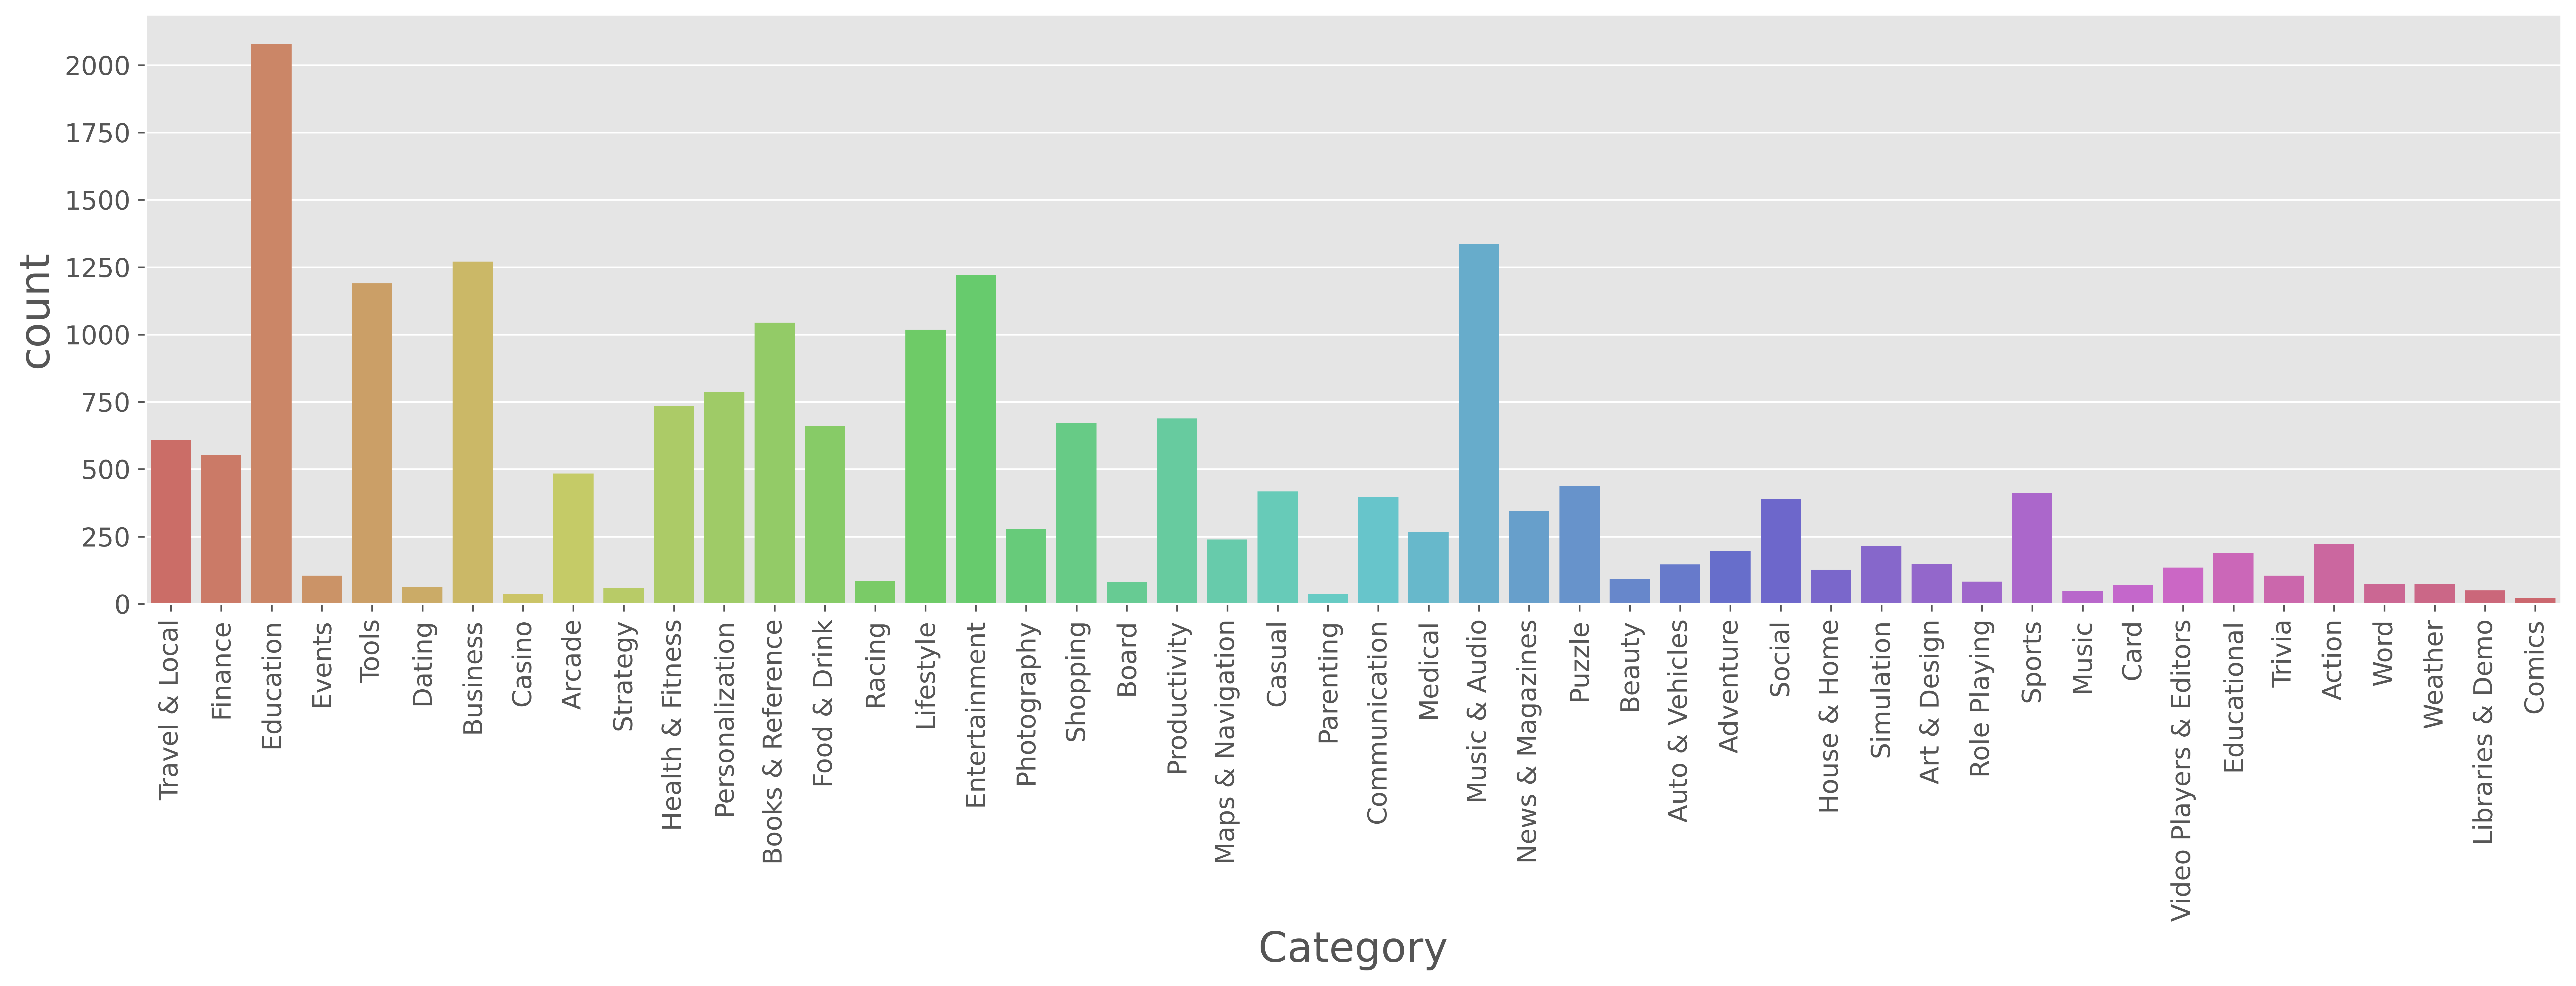

In [18]:
#Plot Maximum installs Plot by each category
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

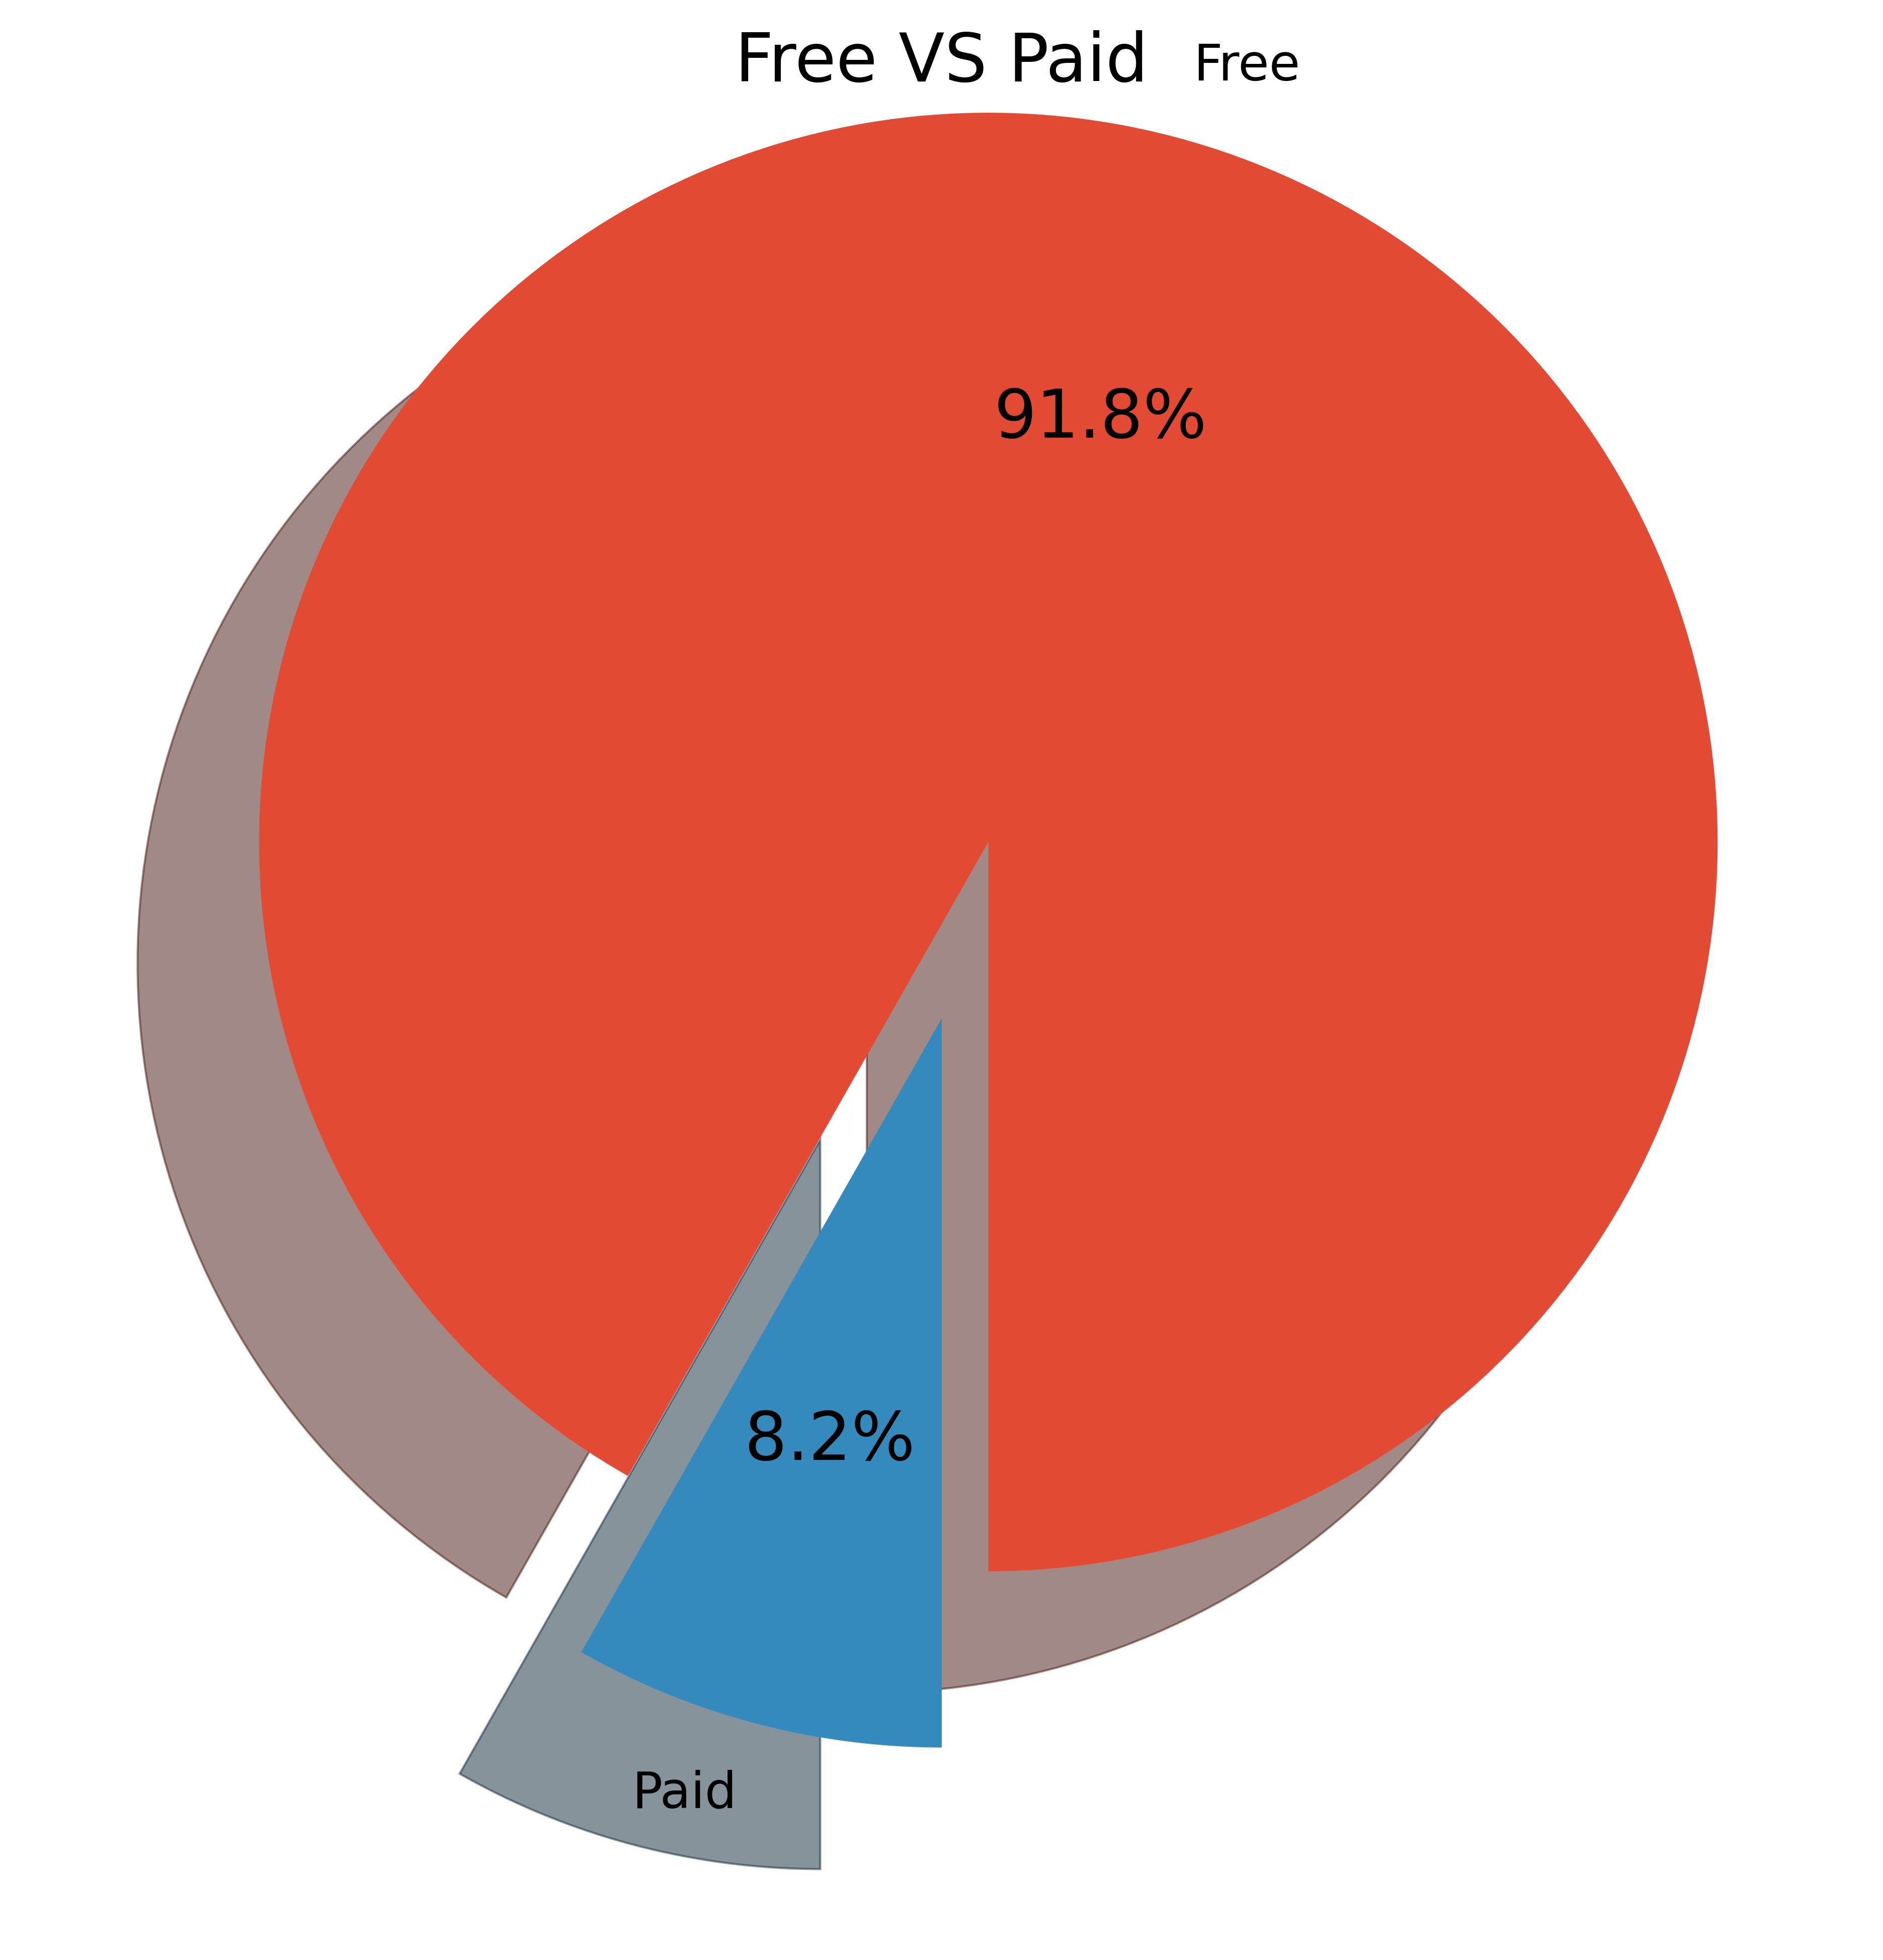

In [19]:
## Plot pie chart content rating
plt.figure(figsize=(8,8))
count = df['In App Purchases'].value_counts()
plt.pie(count, explode=(0.25,0), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Free VS Paid', size = 16)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Tools'),
  Text(4, 0, 'Books & Reference'),
  Text(5, 0, 'Personalization'),
  Text(6, 0, 'Lifestyle'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Puzzle'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Arcade'),
  Text(14, 0, 'Travel & Local'),
  Text(15, 0, 'Casual'),
  Text(16, 0, 'Sports'),
  Text(17, 0, 'News & Magazines'),
  Text(18, 0, 'Social'),
  Text(19, 0, 'Communication'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Photography'),
  Text(22, 0, 'Simulation'),
  Text(23, 0, 'Action'),
  Text(24, 0, 'Adventure'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  

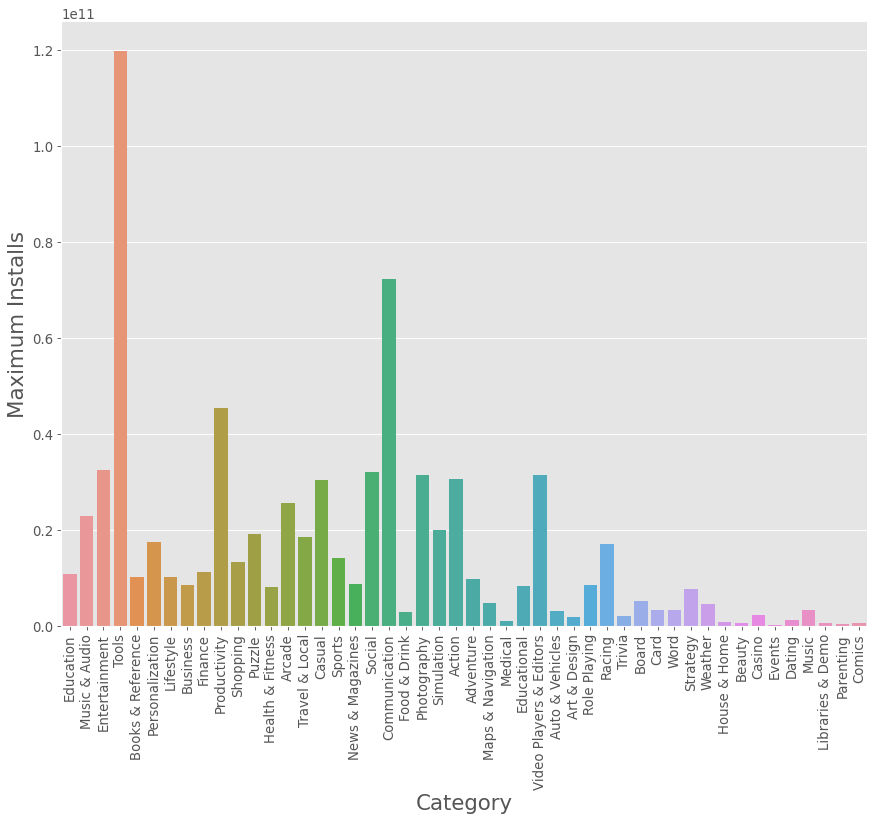

In [20]:
# plot Maximum installs by content rating
plt.figure(figsize=(13,10), dpi= 80)
ax = sns.barplot(x=category_dist.index, y=category_dist["Maximum Installs"])
plt.xticks(rotation=90)

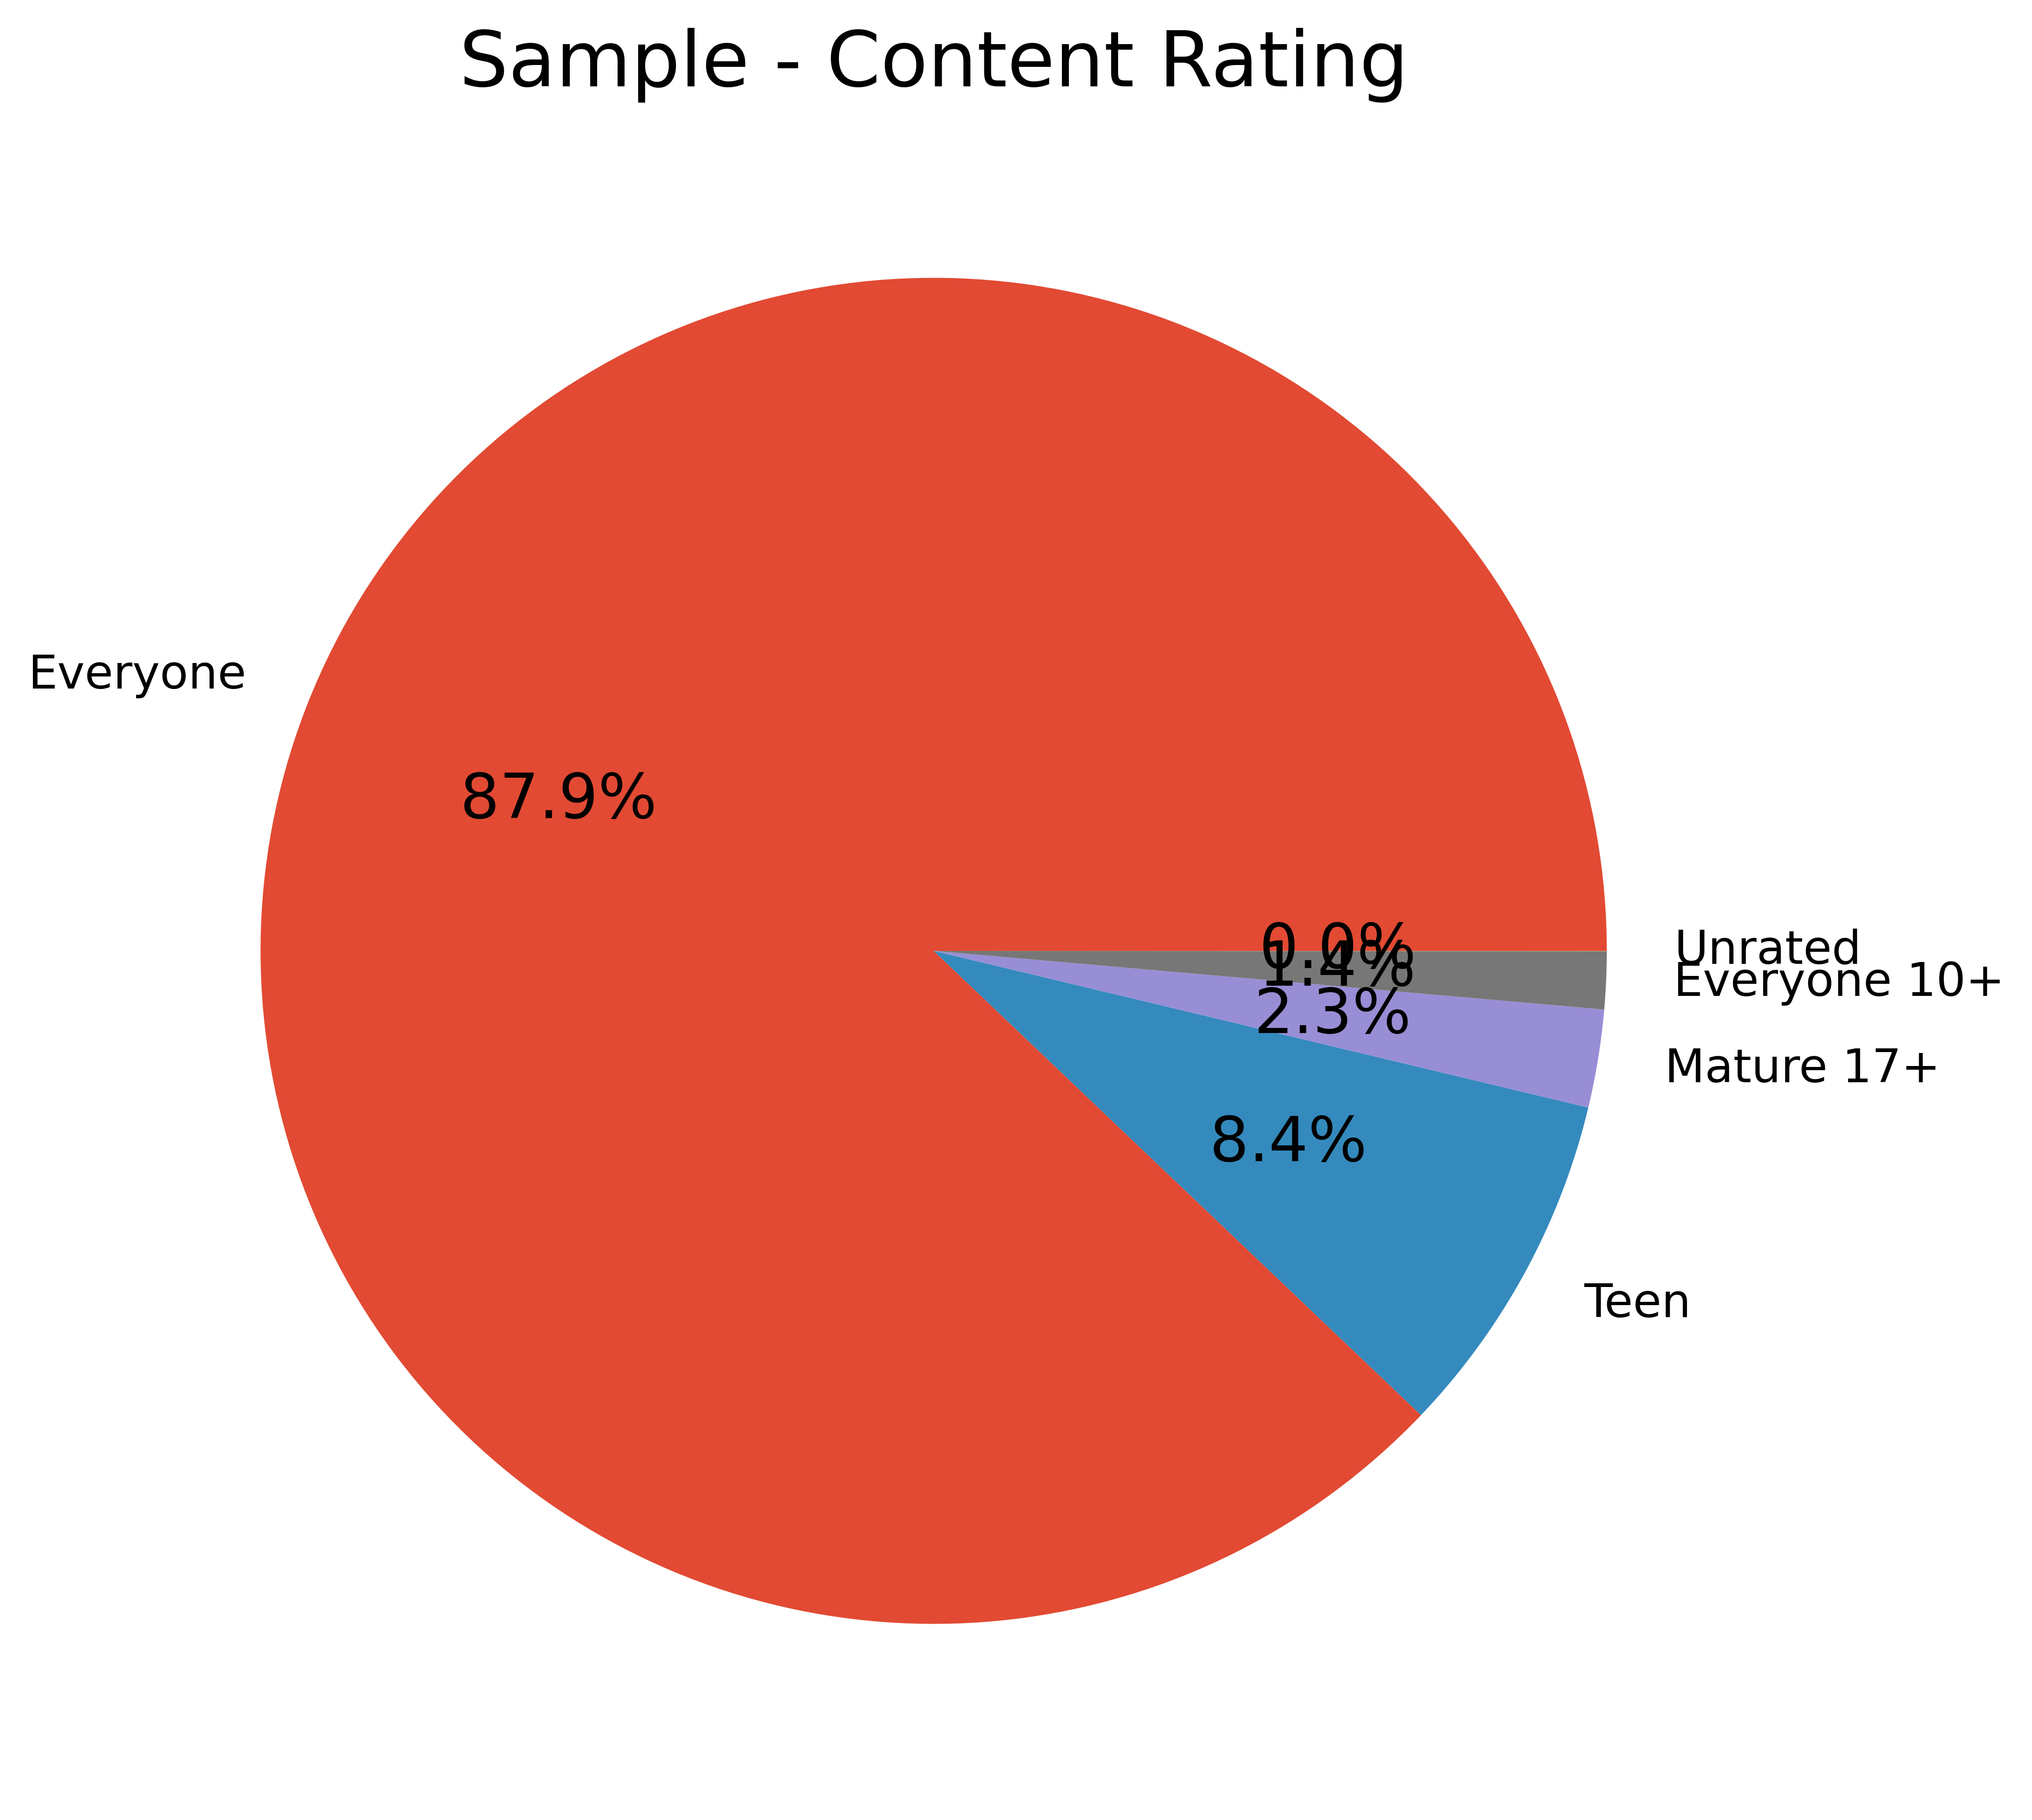

In [21]:
# Plot pie chart by Content Rating
fig = plt.figure(figsize=(16,8))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False)
plt.title('Sample - Content Rating',size = 20)

plt.show()

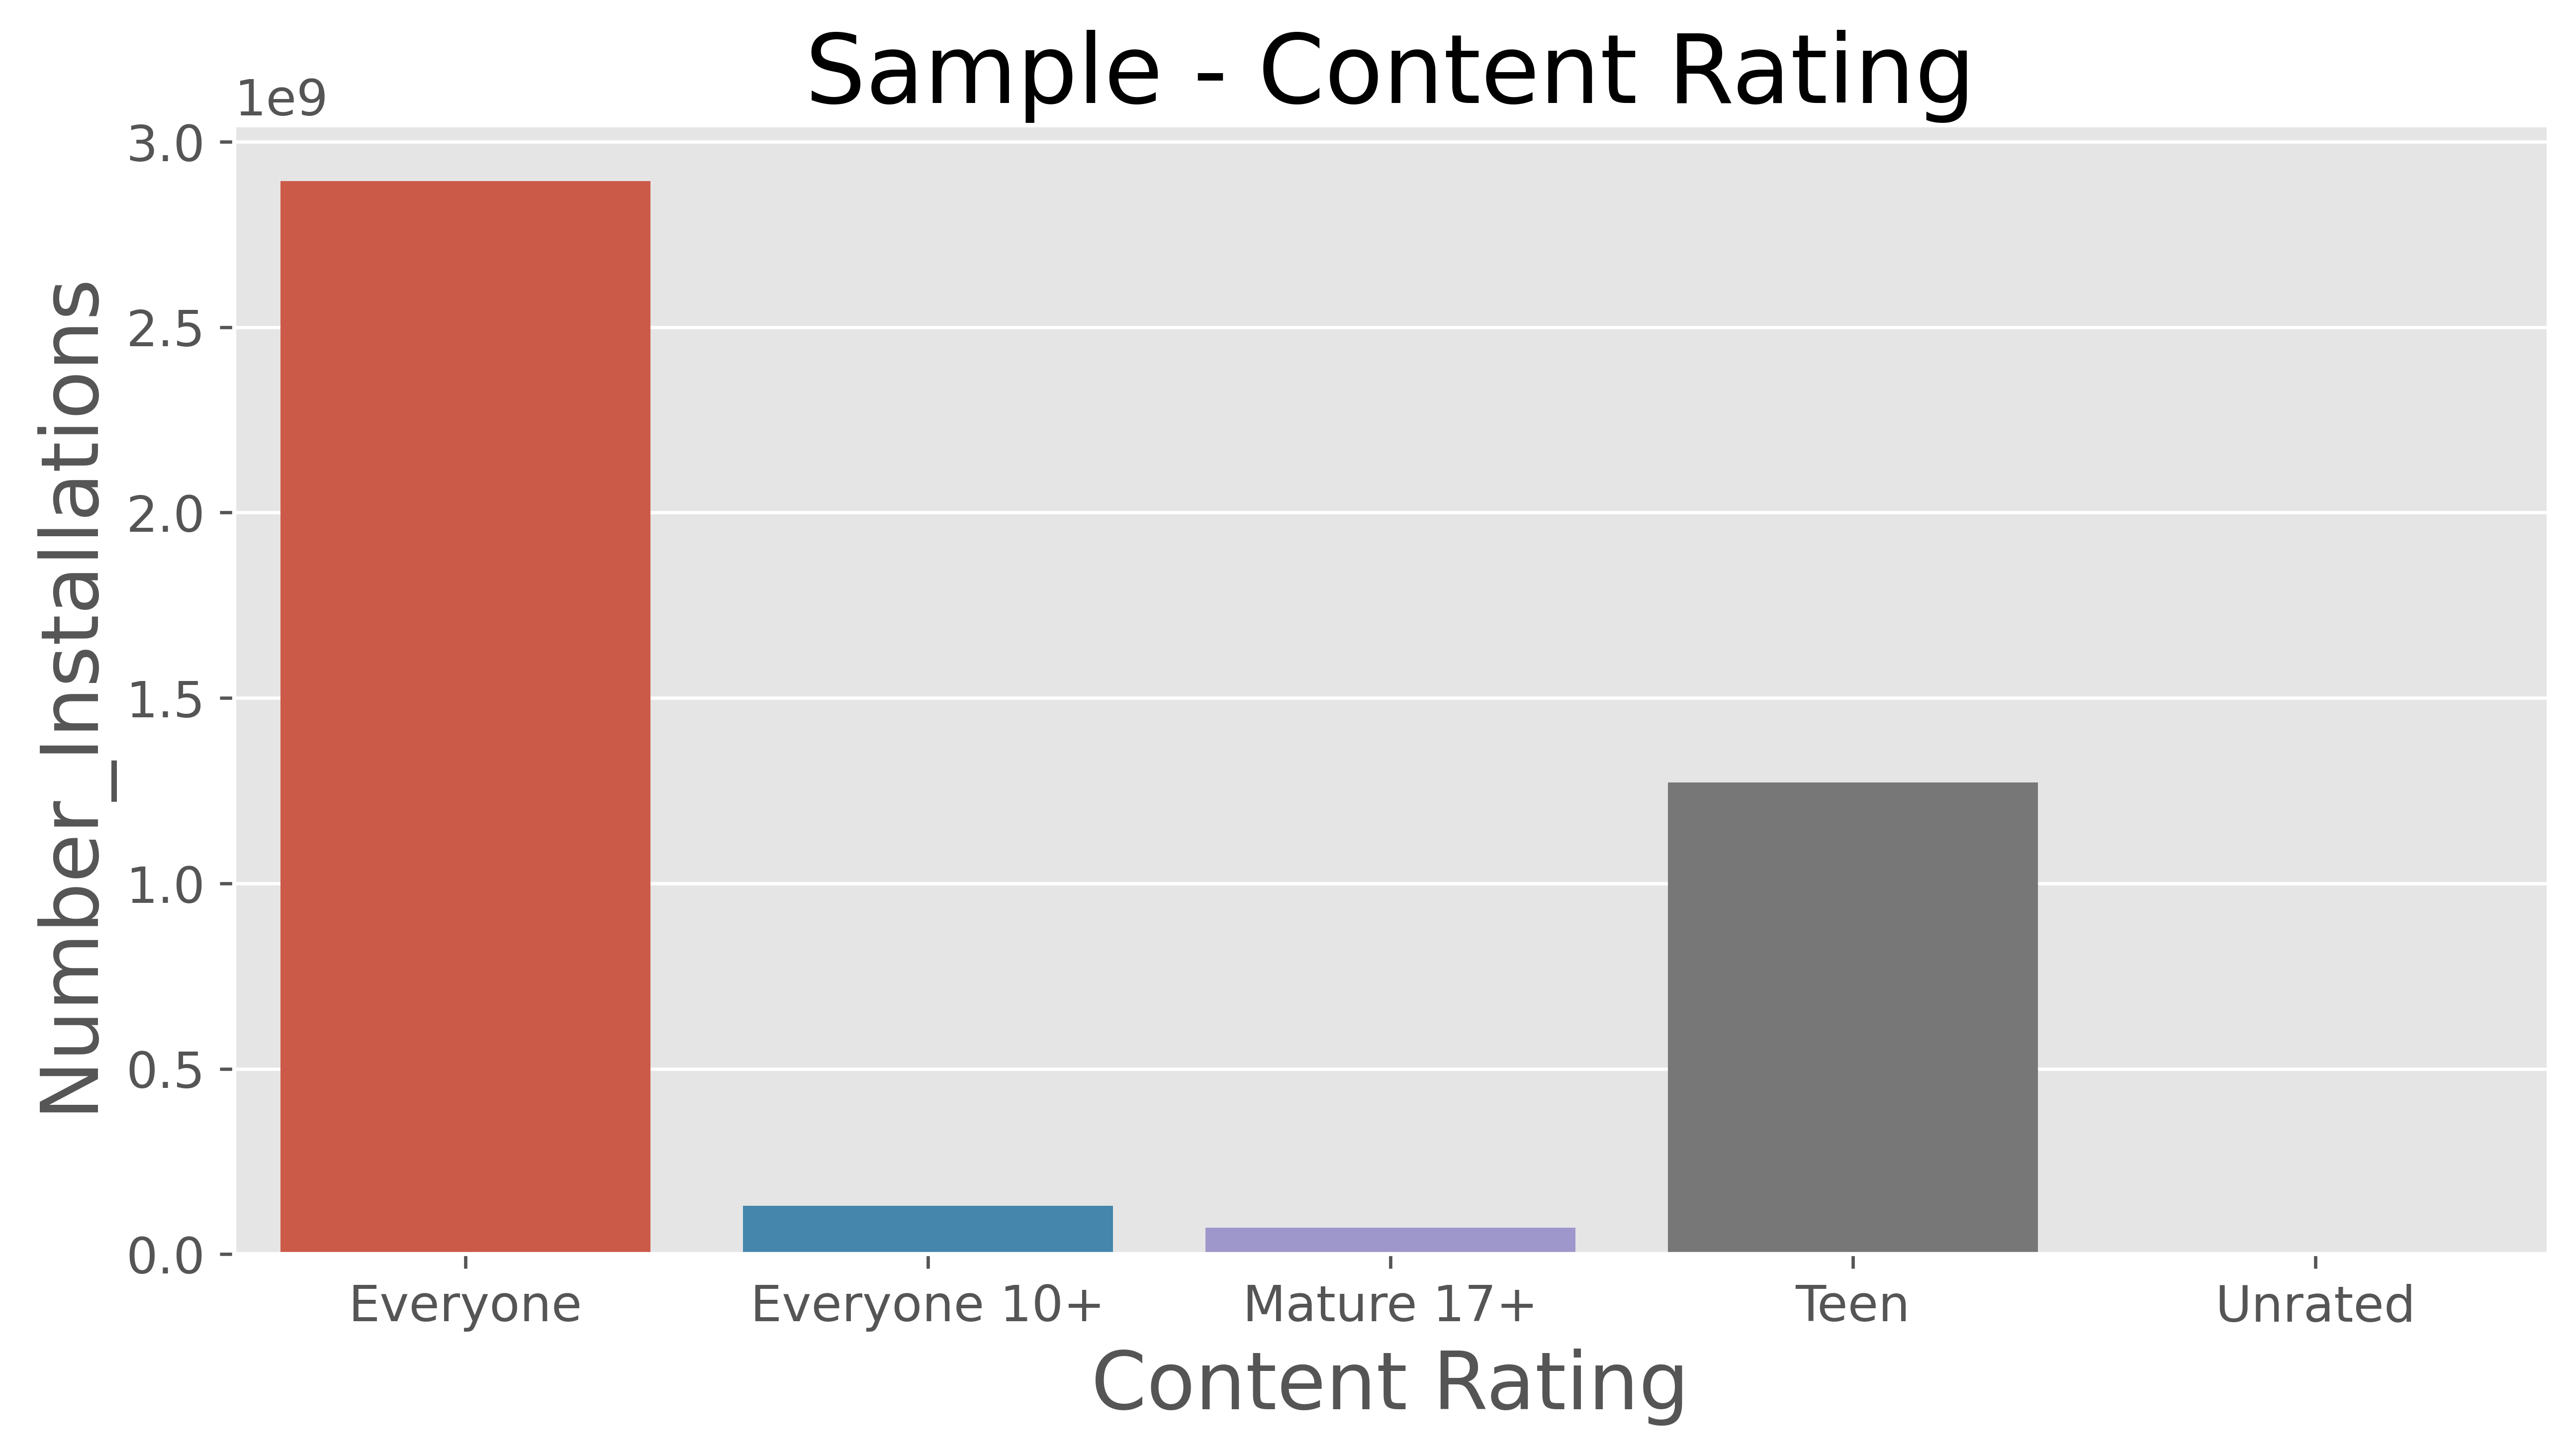

In [22]:
#Plot barplot using Content Rating feature
data_cont =  df.groupby('Content Rating')['Maximum Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.title("Sample - Content Rating")
plt.show()

Text(0.5, 1.0, 'Sample - Rating VS Content Rating')

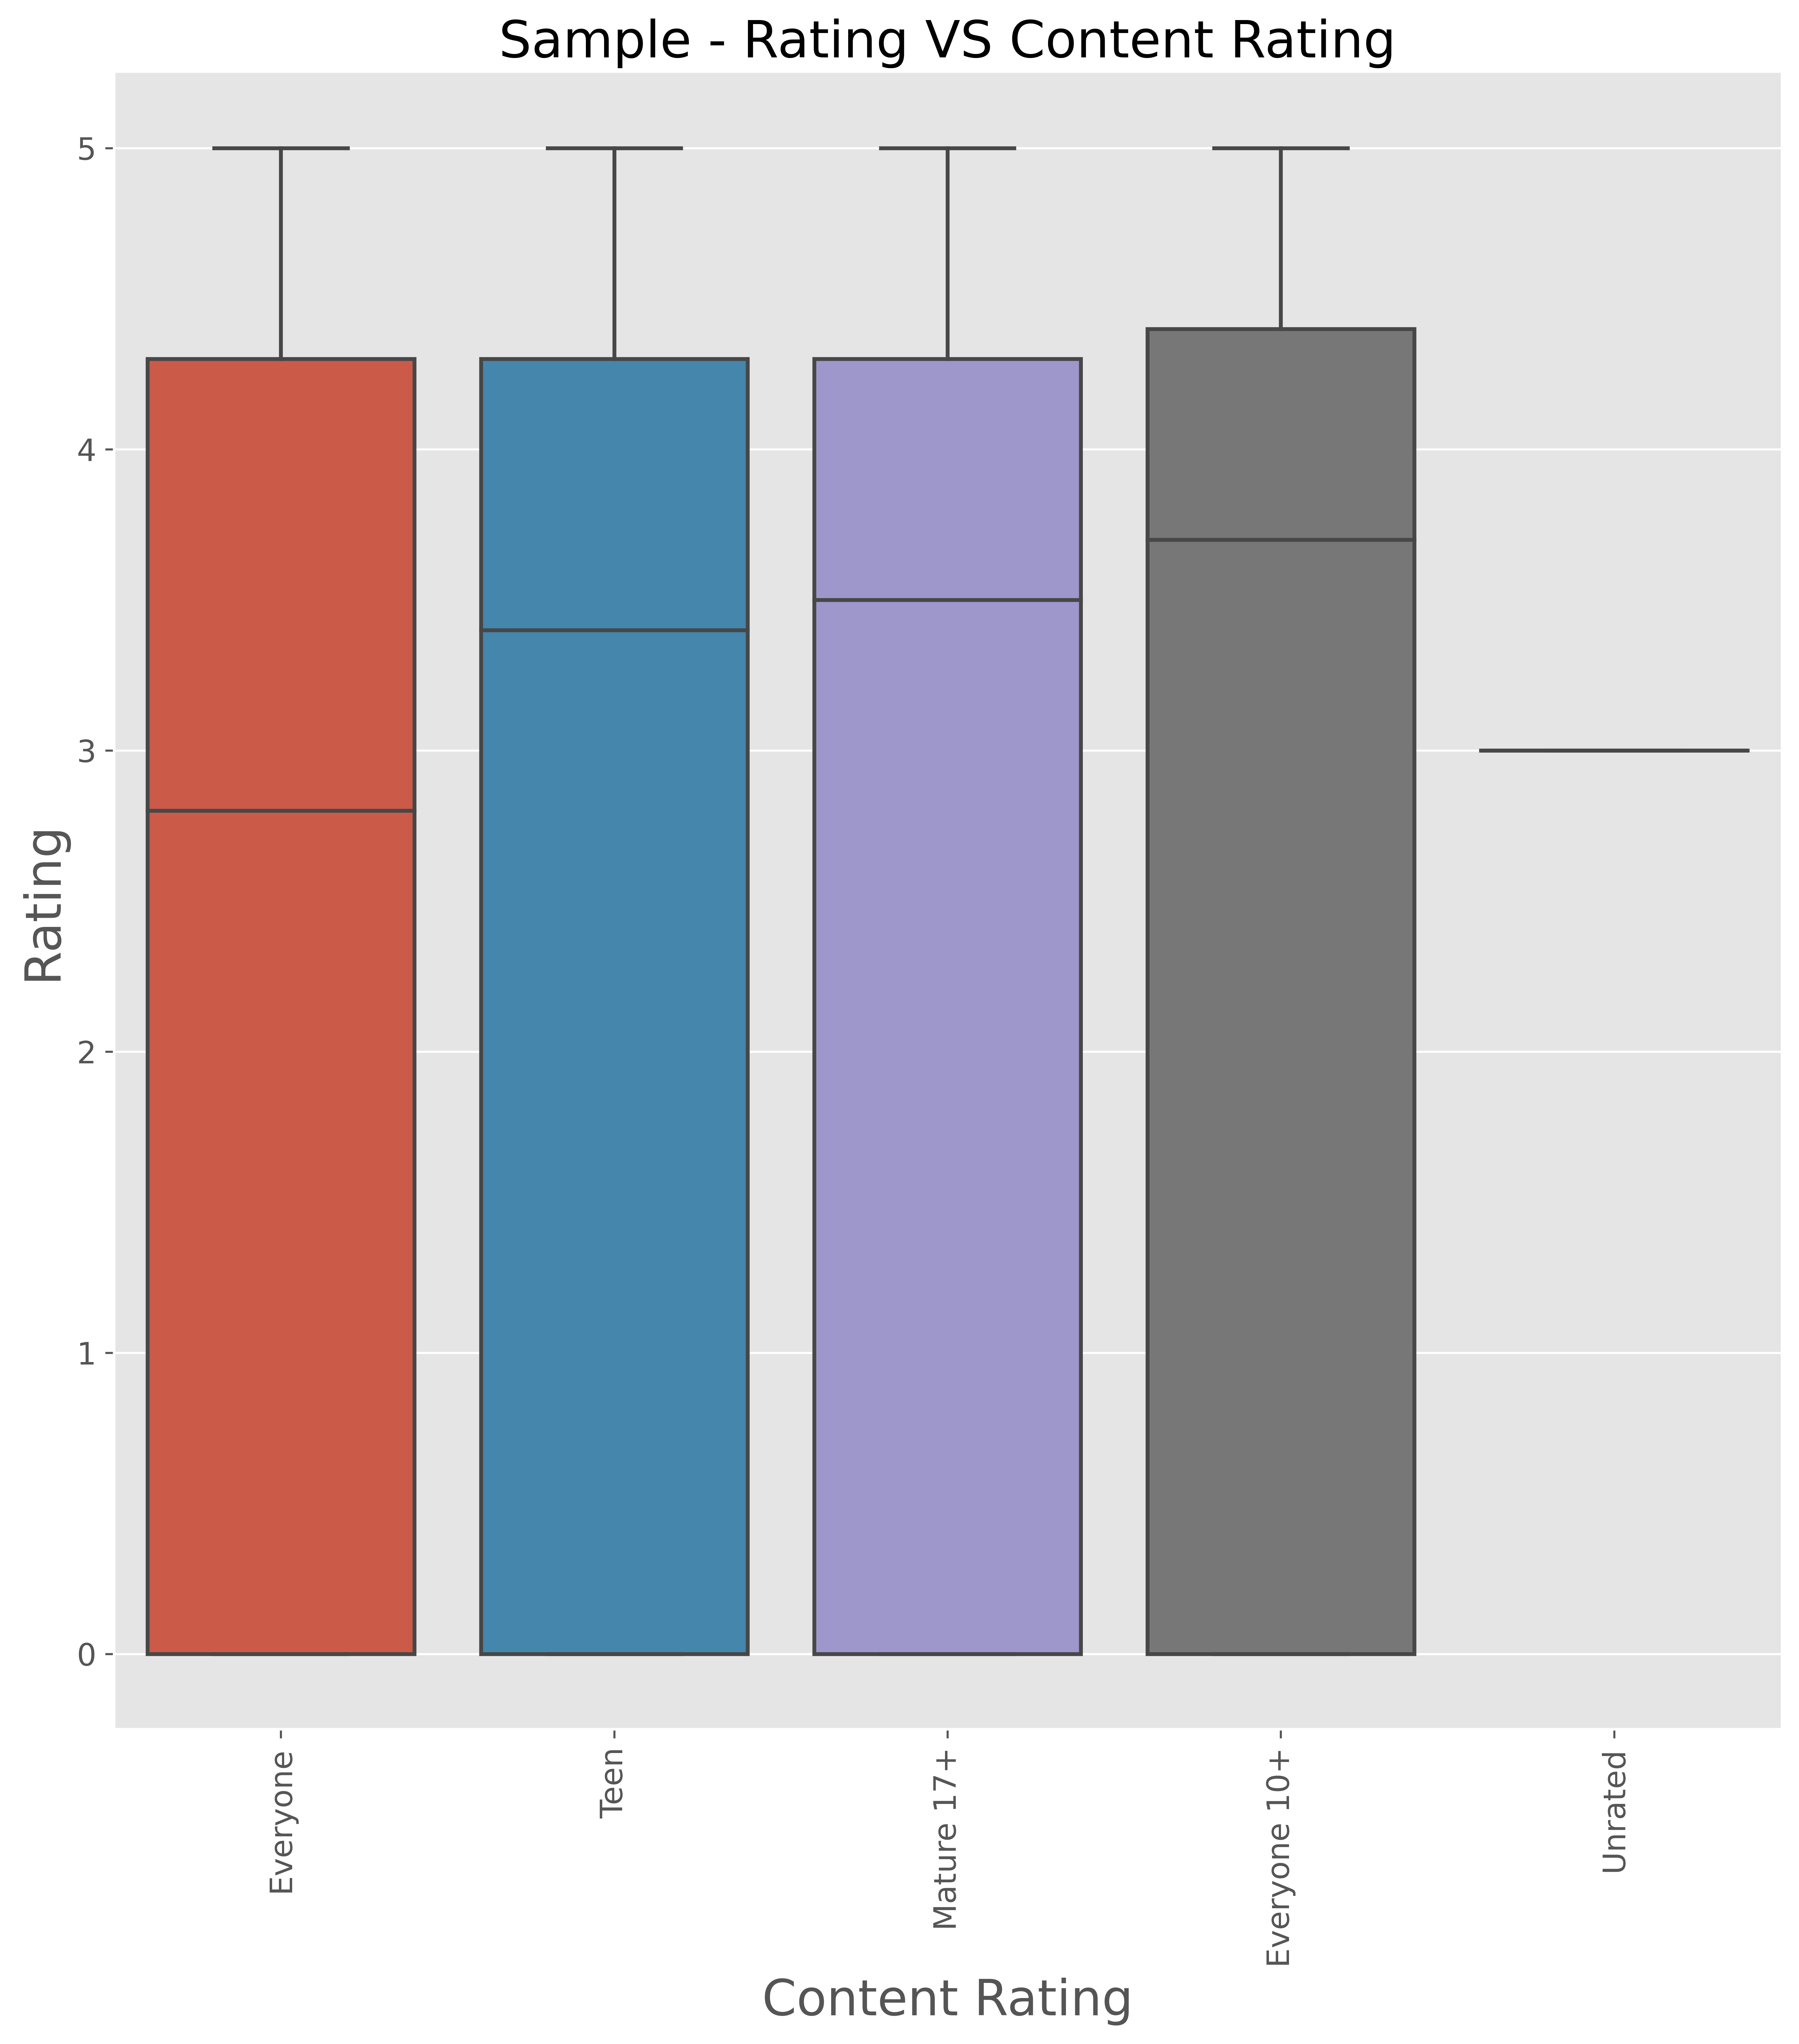

In [23]:
# Boxplot Rating following content rating
_ = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title('Sample - Rating VS Content Rating',size = 20)

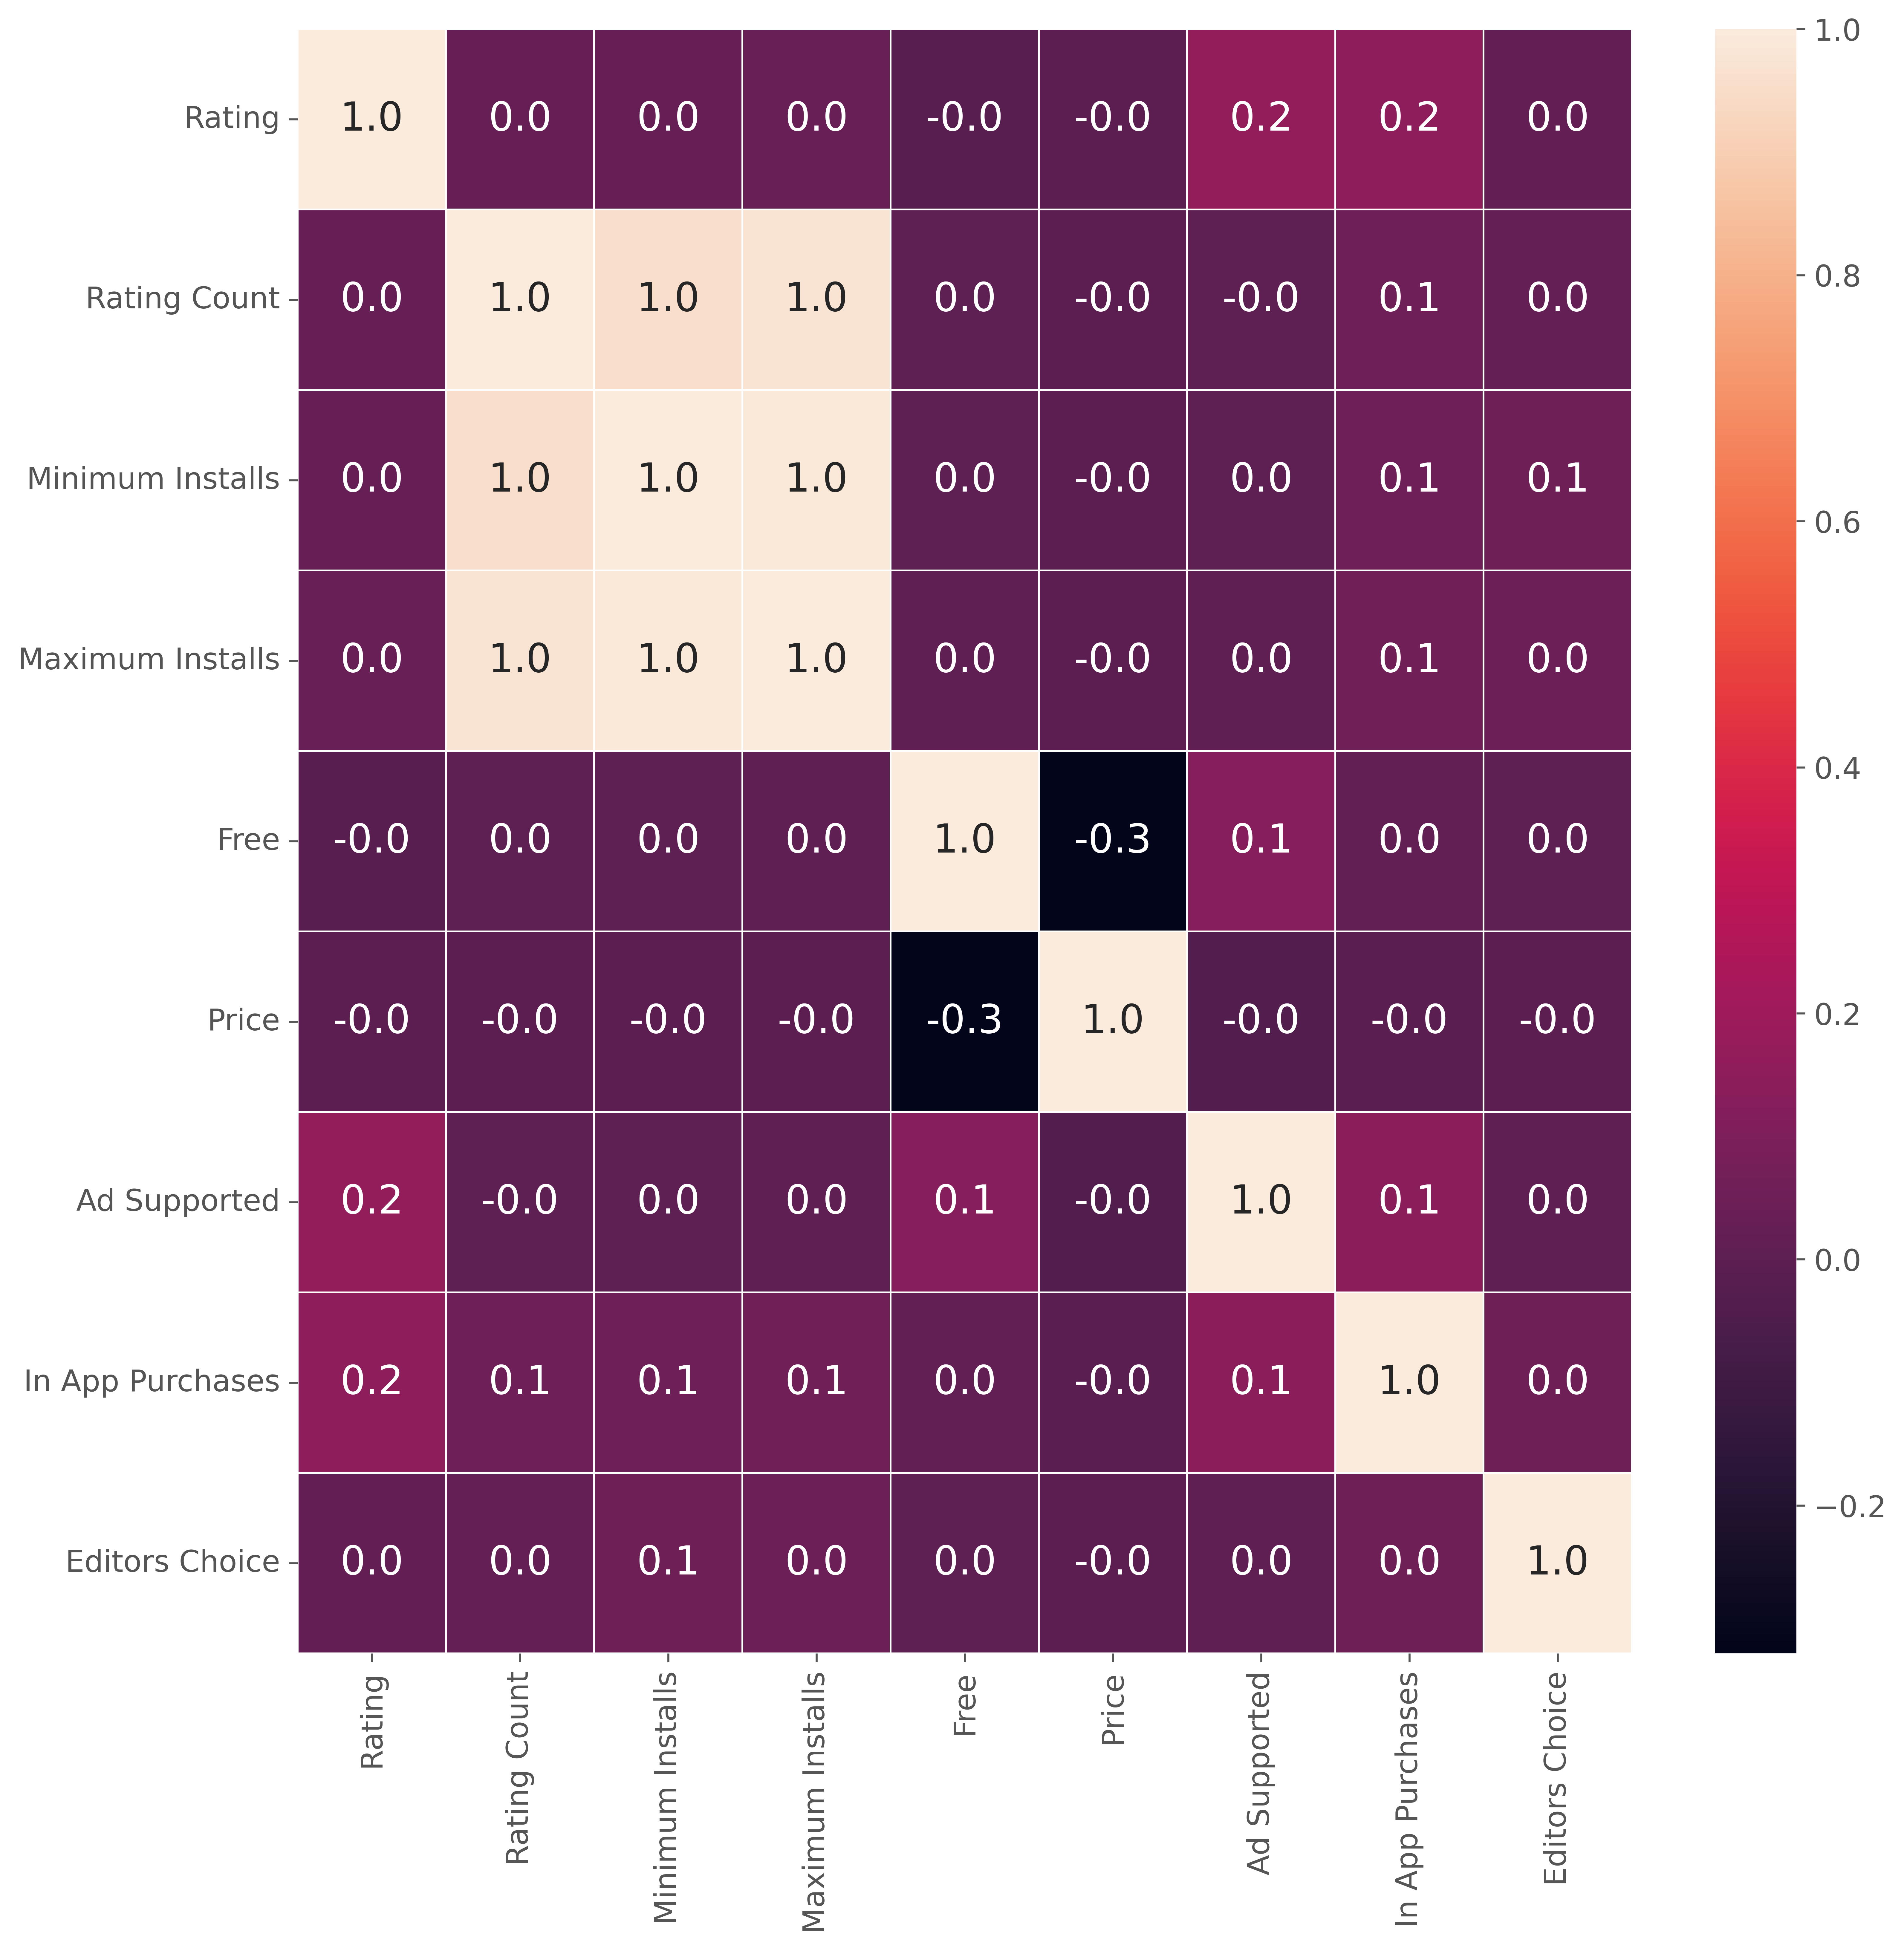

In [24]:
# Find correlation between each features and plot using heatmap
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [25]:
df.to_csv('Google-Playstore(new).csv')